<div style="text-align:center; font-size:36px; color:purple;"><b><u>Credit Card Fraud Detection Project</u></b></div>

<span style="font-style: italic; font-size: 20px; ">**Name:**</span> <span style="font-weight: bold; font-style: italic; color:orange; font-size: 20px;">Shu-Ren Chang </span>

<span style="color:blue; font-size:11px; ">

# Introduction

</span>

- This project is dedicated to enhancing financial security by employing advanced machine learning and data analysis techniques for credit card fraud detection.

- The aim is to develop a predictive model that can proactively differentiate between legitimate and fraudulent credit card transactions.

- Utilizing machine learning, specifically supervised learning and anomaly detection, the project surpasses traditional rule-based systems and adapts to the dynamic nature of fraud patterns.

- The approach includes data preprocessing, feature engineering, model selection, and evaluation metrics.

- Exploration of machine learning algorithms such as logistic regression, decision trees, random forests, and support vector machines is conducted to find the most effective method for fraud detection.

- The ultimate goal is to provide a robust, efficient, and adaptive solution to protect financial transactions from the evolving threats of fraudulent activities.

<span style="color:blue; font-size:11px; ">

# Project Objectives

</span>

- The objective is to use machine learning models to predict fraudulent credit card transactions, involving preprocessing and exploration of the dataset, which may include transaction amount, location, time, and previous transaction history.

- After dividing the dataset into training and testing sets, various machine learning algorithms are applied to create predictive models.

- Models are trained on a labeled dataset, identifying instances of fraudulent and non-fraudulent transactions. Evaluation metrics such as precision, recall, and the F1 score are used to assess the model's performance. Continuous improvement may involve hyperparameter tuning, employing ensemble methods, or exploring advanced techniques like anomaly detection.

- The final model is designed to accurately detect and prevent fraudulent credit card transactions by learning from historical data patterns.

<span style="color:blue; font-size:11px; ">

# Project Understanding

</span>

- Imagine receiving a call from the bank, notifying about an imminent card expiration. Upon checking, it's confirmed that the card will expire soon. The bank representative requests verification of details like the credit card number, expiry date, and CVV number. It's crucial to exercise caution, as sharing these details could provide complete access to the credit card account.

- With the surge in digital transactions in India, safety remains a concern. The sharp increase in fraudulent activities, with tens of thousands of cases reported, highlights the urgency of detecting fraudulent transactions promptly to protect consumers and banks from credit loss. Machine learning is pivotal in this effort.

- The module covers the selection and understanding of machine learning models based on various scenarios, an essential skill for data scientists and machine learning engineers. It also addresses handling class imbalances, model selection, and hyperparameter tuning.

- By the end of this module, the ability to build a machine learning model capable of detecting fraudulent transactions will be developed, along with strategies for managing class imbalances and optimizing model selection and tuning.

<span style="color:blue; font-size:11px; ">

# Problem Statement

</span>

- The problem statement for this project is the prediction of fraudulent credit card transactions using machine learning models.

<span style="color:blue; font-size:11px; ">

# Business Problem Overview

</span>

- Many banks aim to retain highly profitable clients, but banking fraud poses a significant threat to this goal, affecting monetary losses, credibility, and trust for both banks and customers.

- Banking scams are projected to cause substantial financial losses globally. As digital payment channels multiply, so do the methods of committing fraudulent transactions.

- Credit card fraud detection using machine learning is not only prevalent but also necessary in the banking sector to implement proactive monitoring and fraud prevention measures. This technology benefits organizations by reducing manual reviews, chargebacks, fees, and false transaction denials.

<span style="color:blue; font-size:11px; ">

# Understanding and Defining Fraud Logic

</span>

Credit card fraud involves unauthorized acts aimed at obtaining financial gain through deceitful means. Skimming, duplicating information from a card's magnetic strip, is one of the most common methods. Other methods include:

- Manipulation or alteration of genuine cards
- Creation of counterfeit cards
- Theft or loss of credit cards
- Fraudulent telemarketing

<span style="color:blue; font-size:11px; ">

# About the Dataset

</span>

- The dataset from Kaggle includes 284,807 transactions, with 492 being fraudulent. The significant imbalance requires careful handling before model development.

- Recognizing fraudulent transactions is vital for credit card companies to prevent charging customers for unauthorised purchases.

- The dataset consists of transactions by European cardholders in September 2013, with a small percentage of frauds. Due to confidentiality, only numerical input variables from a PCA transformation are provided, excluding 'Time' and 'Amount'.

- For imbalanced classes, accuracy assessment through the Area Under the Precision-Recall Curve is recommended over the confusion matrix.

<span style="color:blue; font-size:11px; ">

# Metric Used

</span>

### ROC-AUC Score

- The ROC-AUC score assesses a binary classifier's ability to distinguish between classes by calculating the area under the receiver operating characteristic curve.

- This score is a reliable indicator of model discrimination ability, even with class imbalance.

### F1 Score

- The F1 score combines recall and precision, providing a balanced measure of a binary classifier's accuracy.

### Precision

- Precision measures the accuracy of a model's positive predictions, indicating the proportion of true positives among all positive predictions.

### Recall

- Recall assesses a model's completeness, reflecting the proportion of actual positive cases correctly identified.



In [187]:
!pip install xgboost

In [188]:
# Import packages for computation
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Import packages for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import packages for model building 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [189]:
#To read the data csv File from Kaggle
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [190]:
df.shape

(284807, 31)

In [191]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [192]:
#Check the data type for the different features in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

### Find and handle missing data

In [193]:
# Check for missing value presented in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that there is no missing value present in the dataframe.

### Handle outliers

Since the whole dataset was transformed with PCA, It is assumed that all outliers are already handled. Thus, no other acitions are needed for handling outliers.

### Check data distributions of the classes

In [194]:
classes=df['Class'].value_counts()
normal_Cases=round(classes[0]/df['Class'].count()*100,2)
fraud_Cases=round(classes[1]/df['Class'].count()*100, 2)
normal_Cases, fraud_Cases

(99.83, 0.17)

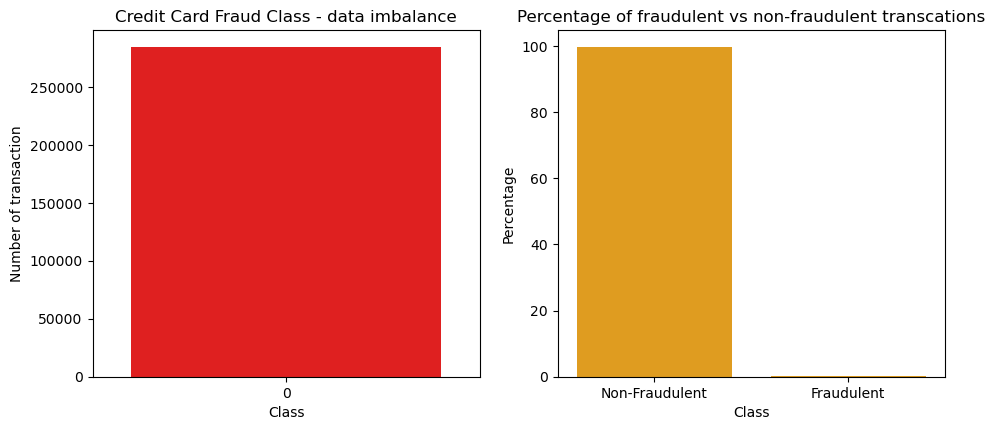

In [195]:
# Create bar plots for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(11,4.5))

plt.subplot(1,2,1)
sns.countplot(df["Class"], color='red')
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data imbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_Cases, fraud_Cases]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage, color='orange')
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

**Results**

Obviously, the dataset has a imbalance issue for between two classes/groups. Among 284,807 records, only 492 cases were labeld as having fradudulent transactions.

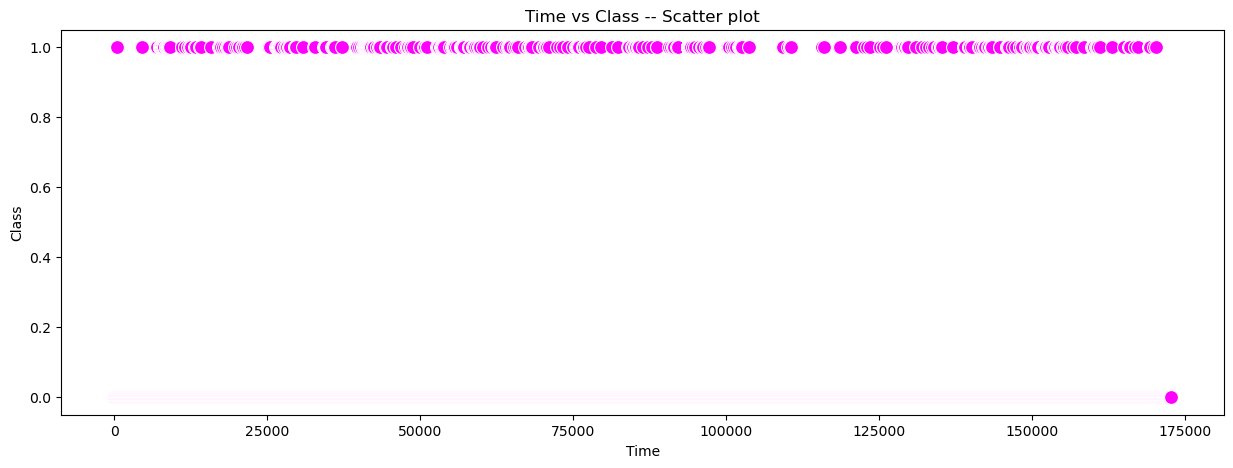

In [196]:
# Set the figure size
plt.figure(figsize=(15, 5))  # You can adjust the values as per your requirement

# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df["Time"], y=df["Class"], s=100, color='magenta')  # s parameter controls the size of markers, color parameter changes the color

plt.title("Time vs Class -- Scatter plot")
plt.show()

**Results**

There is no big discrepancy from data distributions on the fraudulent transaction based on time as fraudulent/non-fraudulent. Both transaction are distributed over time.

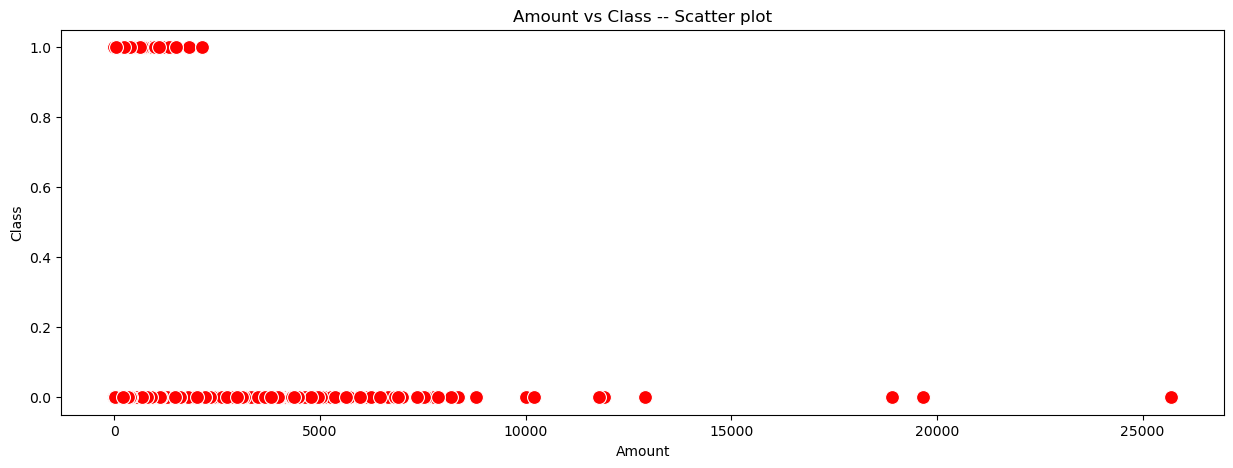

In [197]:
# Set the figure size
plt.figure(figsize=(15, 5))  # You can adjust the values as per your requirement

# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Amount"], y=df["Class"], s=100, color='red')  # s parameter controls the size of markers, color parameter changes the color

plt.title("Amount vs Class -- Scatter plot")
plt.show()

**Results**

Obviously the lower amount of transactions, the higher probability for the fraud transactions.

Keeping `Time` column as a feature might not help the model building at all.

In [198]:
# Drop the unnecessary column, "time".
df = df.drop("Time", axis = 1)

#### Plot the distributions of all the featuers

<Figure size 2000x3500 with 0 Axes>

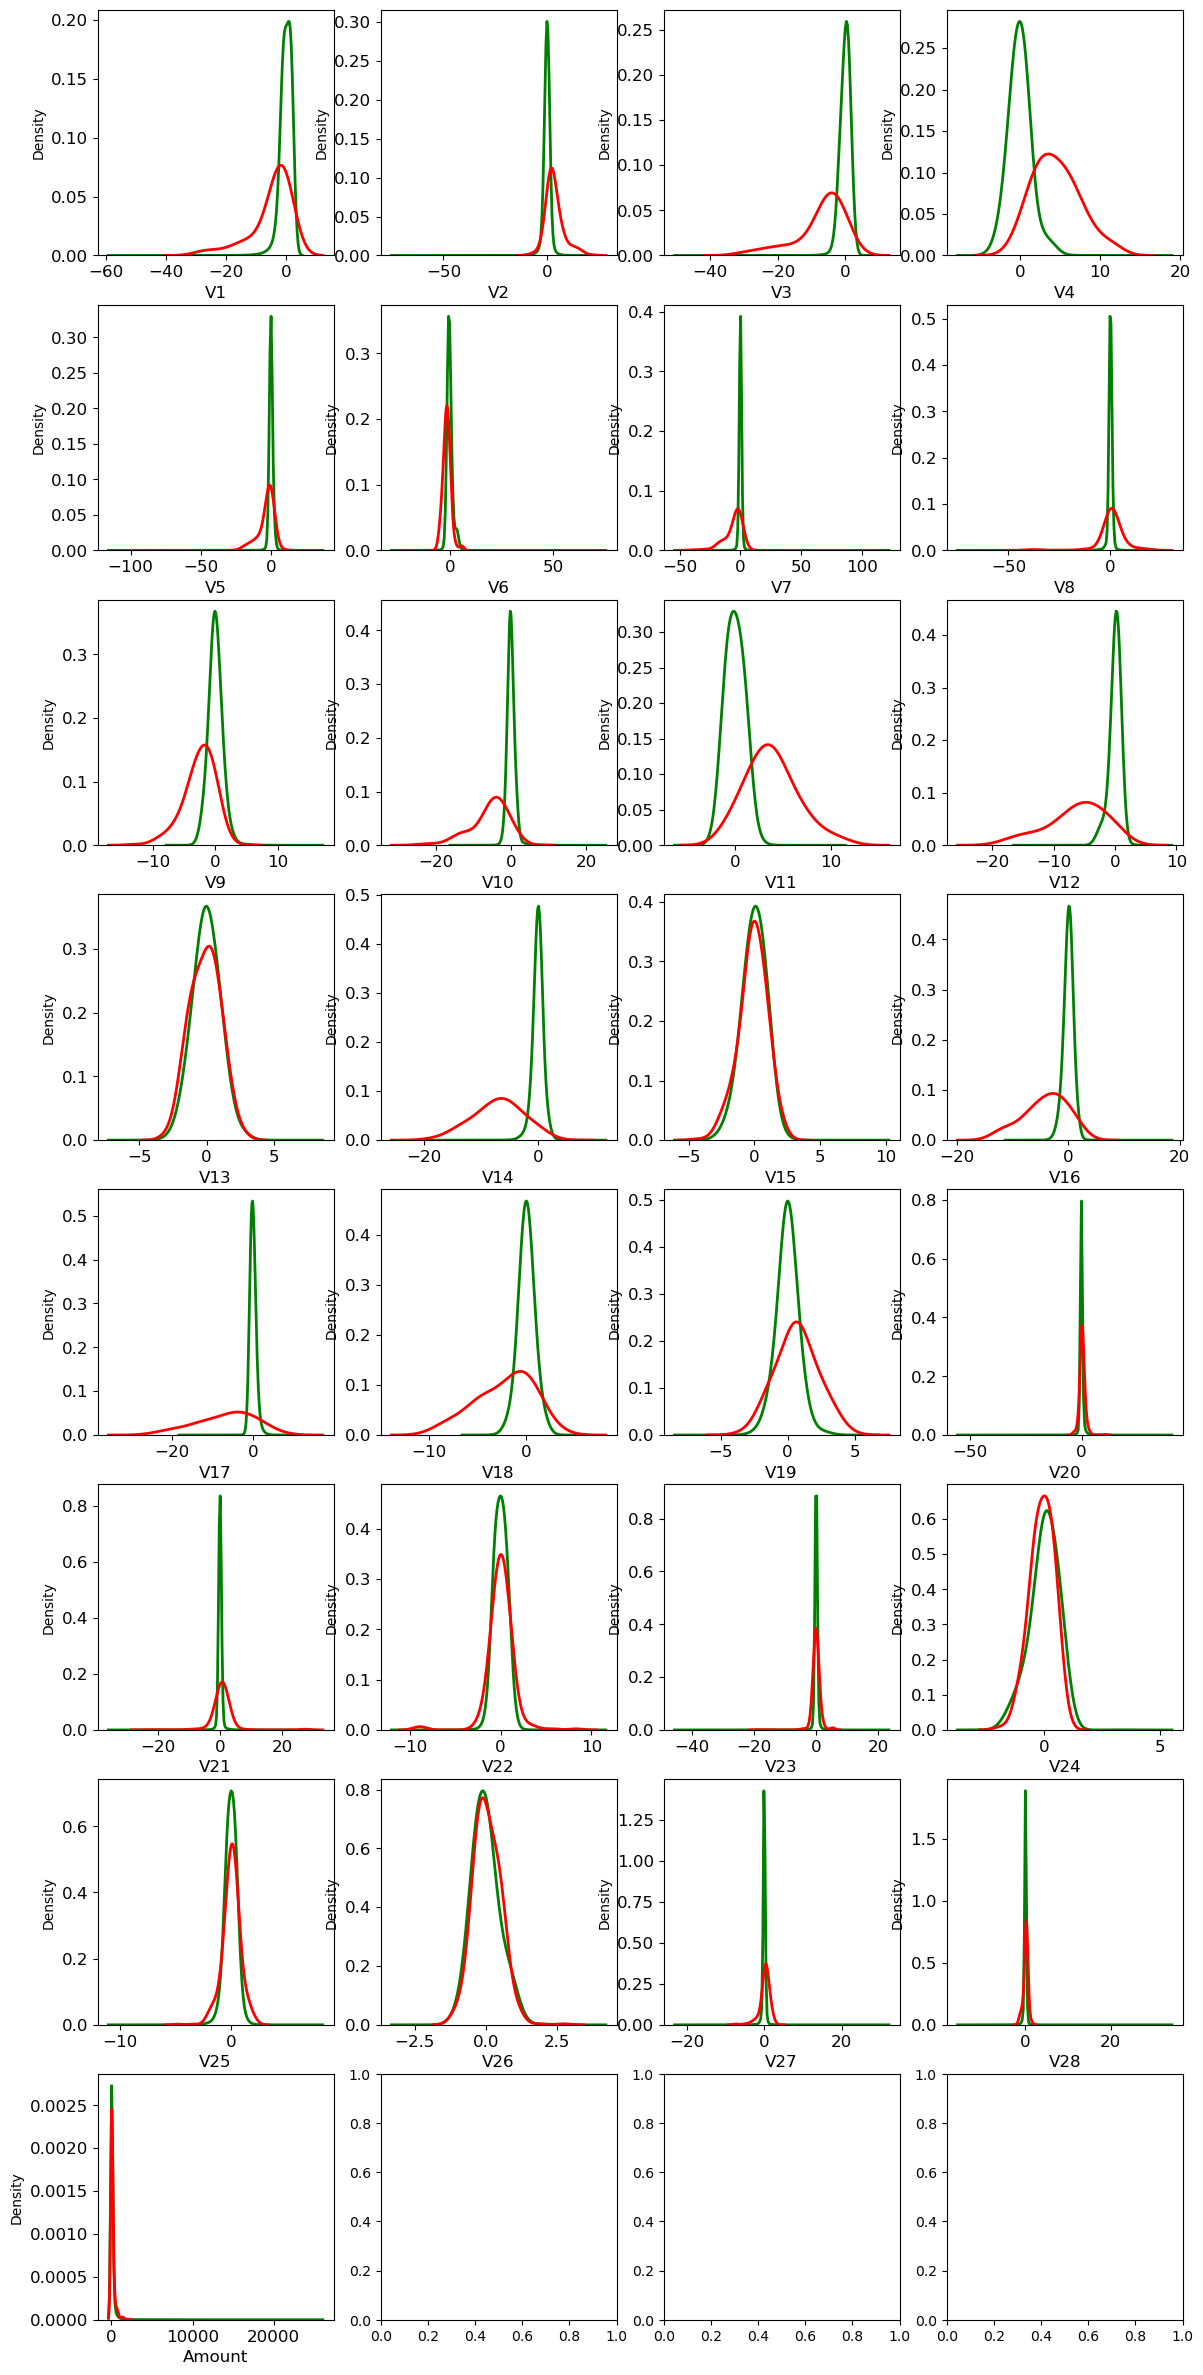

In [199]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

# Increase the figure size
plt.figure(figsize=(20, 35))
fig, ax = plt.subplots(8,4,figsize=(14,30))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    # Change the line color to green for class 0 and increase line width
    sns.kdeplot(t0[feature], bw=0.5, label="0", color="green", linewidth=2)
    # Change the line color to red for class 1 and increase line width
    sns.kdeplot(t1[feature], bw=0.5, label="1", color="red", linewidth=2)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

**Results**

The data distributions showed overlapping for some of the features for both the fraud and non-fraud transactions.

### Split the data into train & test data

In [200]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [201]:
# Spltt the data into 80:20 for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [202]:
# Check the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Scale features with Standard Scaler

Below is to scale the `Amount` column.

In [203]:
# As PCA has been performed on the dataset for features from V1 to V28,  only the "Amount" field is needed to be scaled. 
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [204]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [205]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### Plot the distribution of a variable to handle skewness

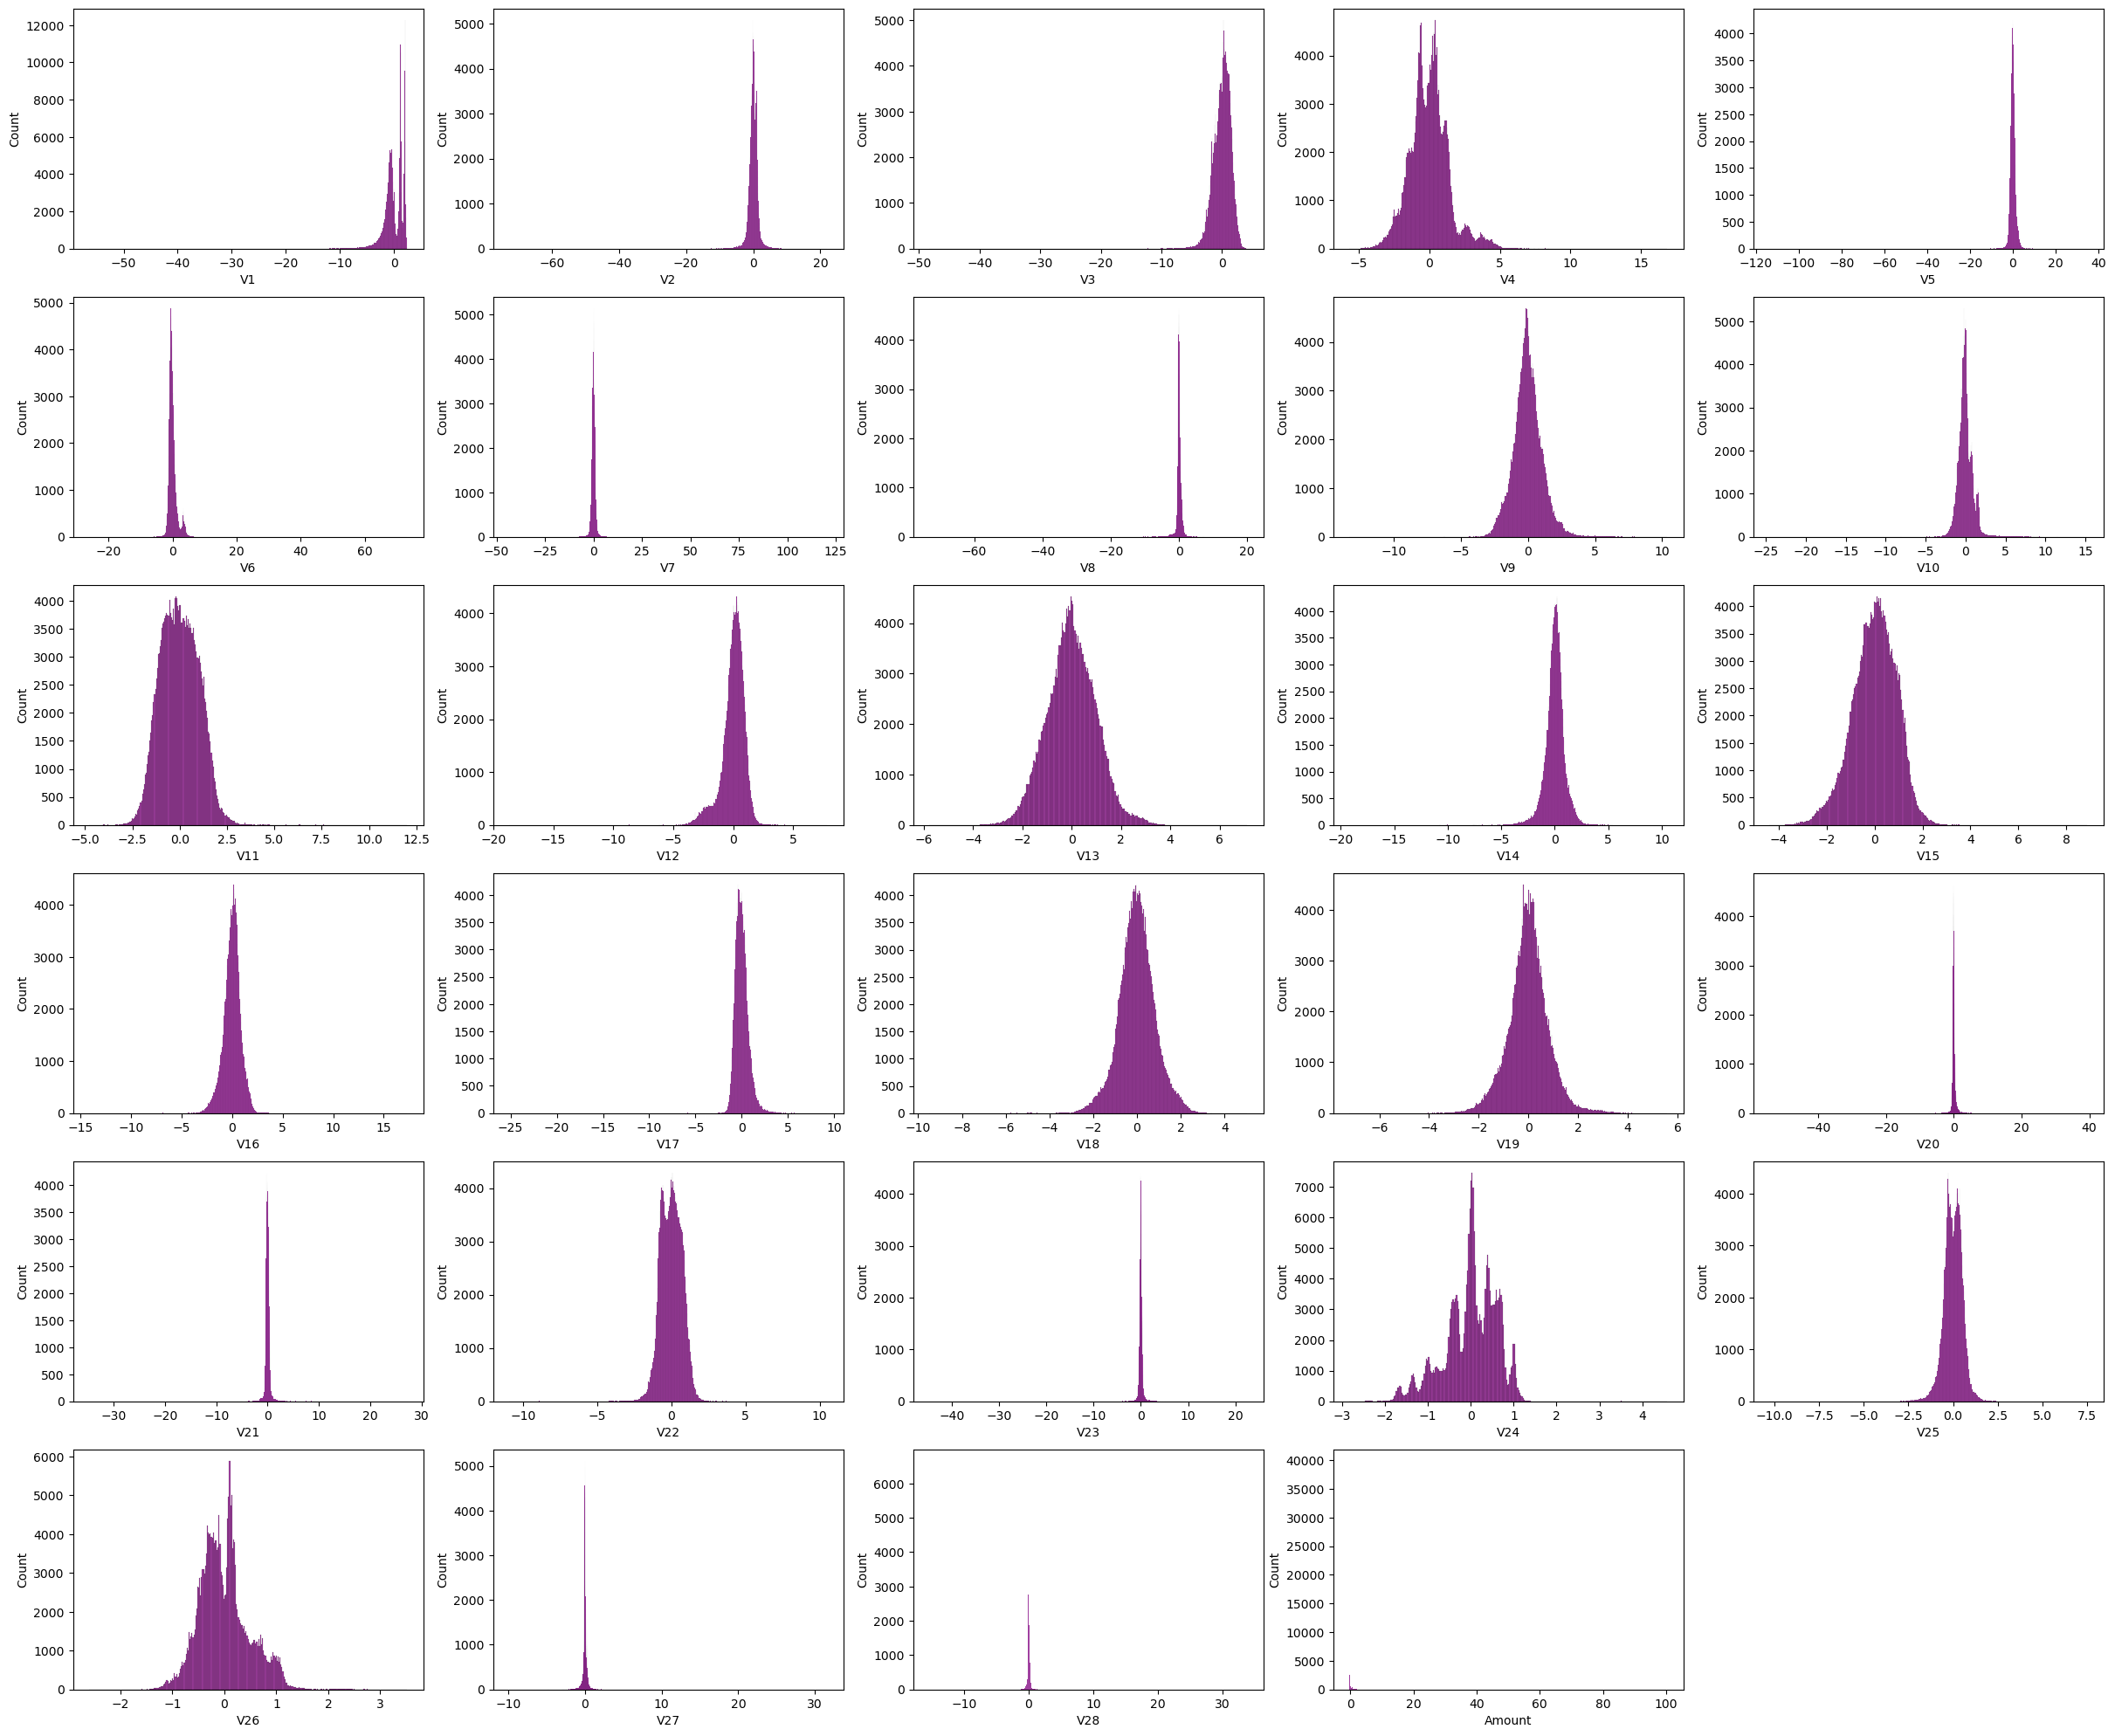

In [206]:
var = X_train.columns

# Increase the figure size
plt.figure(figsize=(30,25)) # Change the size as per your requirement

i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    
    # Use seaborn's histplot instead of distplot (which is deprecated)
    # Set the color to 'purple' and increase the line width
    sns.histplot(X_train[col], color='purple')

plt.show()

Many features are highly skewed. There is a need to check the skewness using skew(). If the skewness is beyond -1 to 1, the power transform is used to transform the data.

In [207]:
# Check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [208]:
# Identify the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### The highly skewness is presented in the identified features above:
- The PowerTransformer package present in the preprocessing library provided by sklearn is used to make the distribution more Gaussian (normal). 

In [209]:
# preprocess  PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fit the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transform the test data
X_test[skewed] = pt.transform(X_test[skewed])

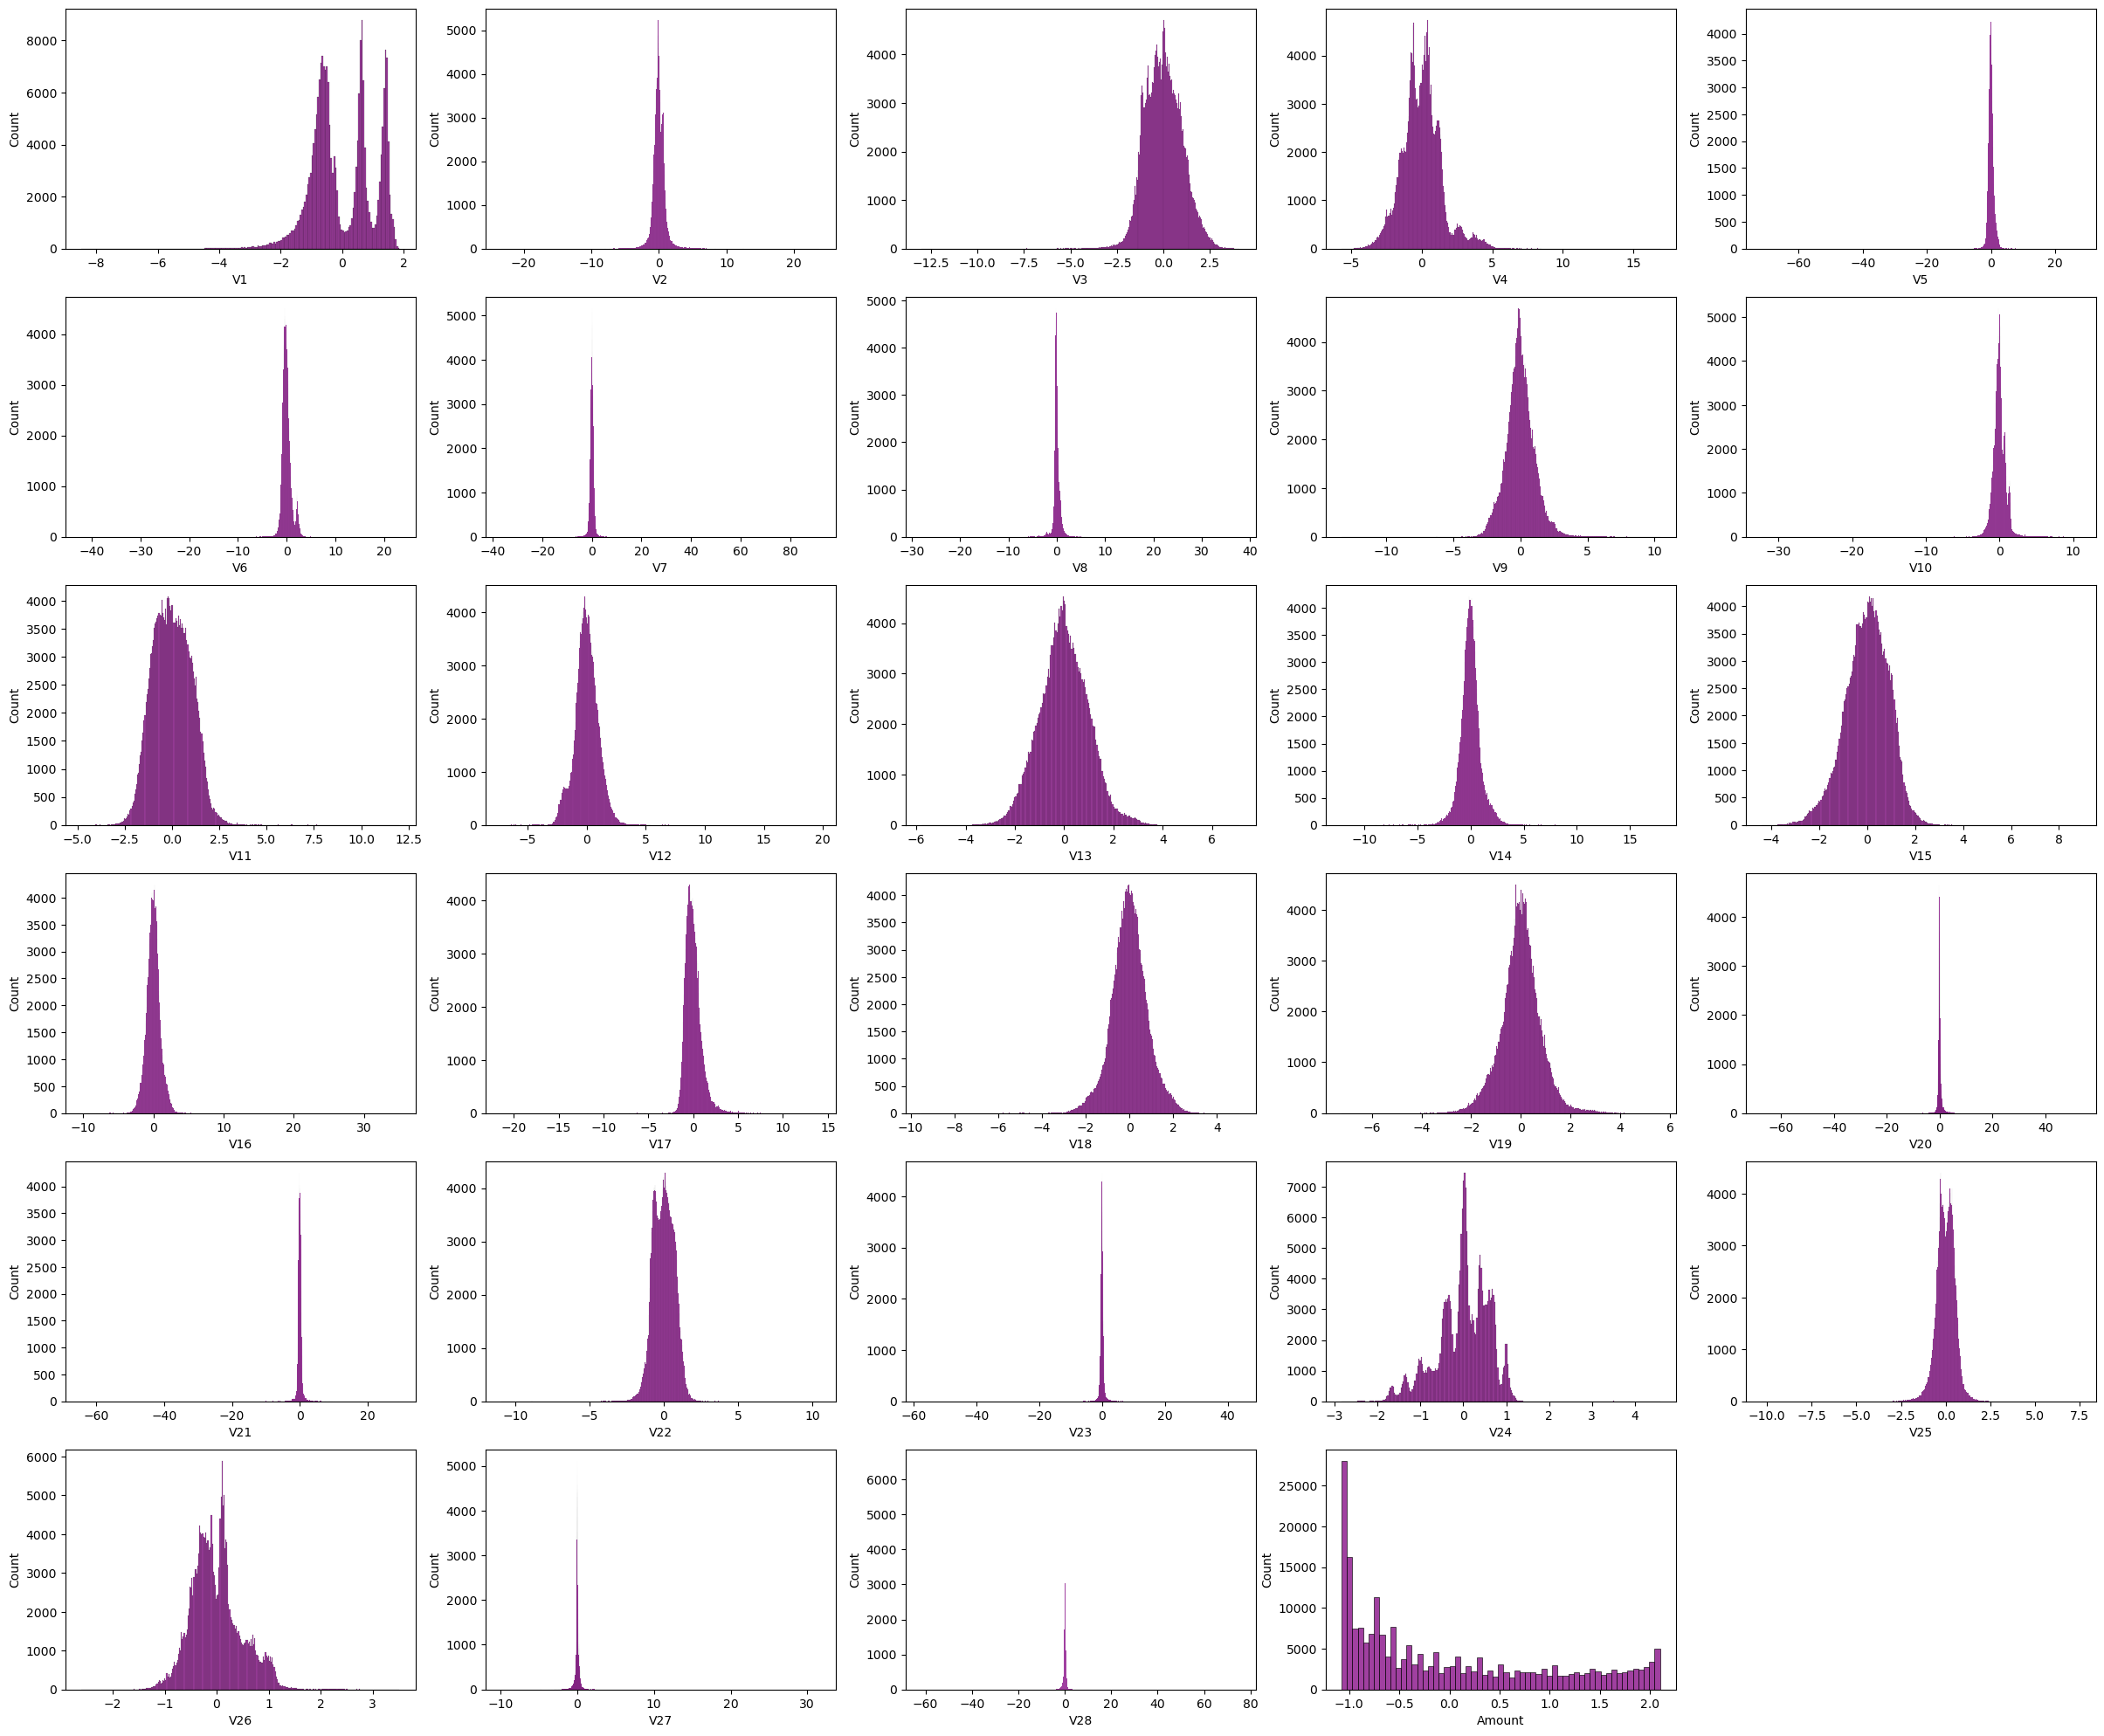

In [210]:
# plot the histogram of a variable from the dataset again to see the result 

var = X_train.columns

# Increase the figure size
plt.figure(figsize=(30,25)) # Change the size as per your requirement

i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    
    # Use seaborn's histplot instead of distplot (which is deprecated)
    # Set the color to 'purple' and increase the line width
    sns.histplot(X_train[col], color='purple')

plt.show()

## Build Models with imbalanced data

In this project, Three models will be created using the algorithms listed below, and then they will be compared to determine which one performs the best. SVM, RandomForest, or KNN are not used in model development due to their high computational demands and significant processing power requirements, especially for SVM and KNN. KNN algorithms calculate the distance between each data point, and this computation is repeated for each data point to identify the nearest neighbor. When dealing with large data sets, this method becomes extremely computationally expensive. These models are omitted due to the current lack of necessary resources. The algorithms that will be used are:

- Logistic Regression
- Decision Tree
- XGBoost

#### Metrics selections for the imbalanced data
To evaluate the model, the ROC-AUC score will be employed as the assessment metric. Given the overall scarcity of fraud incidents and the significant skewness of the data, accuracy is not deemed an appropriate statistic for model assessment.

In [211]:
# check and confirm the Class imbalance
y_train.value_counts()/y_train.shape

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

### 1. Logistic Regression

In [212]:
# Estimate the best parameters for Logistic Regression using K-fold cross validation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Perform cross validation (CV)
model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=folds, 
                        n_jobs=1,  # Set to 1 for debugging
                        verbose=1,
                        return_train_score=True)

# Perform hyperparameter tuning
model_cv.fit(X_train, y_train)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9814533001655027
Best hyperparameters:  {'C': 0.01}


In [213]:
# Get cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.313546,0.075869,0.023456,0.005821,0.01,{'C': 0.01},0.966660,0.987834,0.991868,0.971808,0.989097,0.981453,0.010193,1,0.987070,0.981708,0.980443,0.986561,0.980840,0.983324,0.002884
1,0.256153,0.018811,0.026192,0.009144,0.10,{'C': 0.1},0.967083,0.983684,0.990282,0.966392,0.984831,0.978454,0.009826,2,0.984806,0.978714,0.978578,0.985010,0.979556,0.981333,0.002939
2,0.287505,0.027535,0.024385,0.005928,1.00,{'C': 1},0.967110,0.983119,0.989944,0.965358,0.984313,0.977969,0.009870,3,0.984310,0.978077,0.978235,0.984692,0.979131,0.980889,0.002974
3,0.274424,0.023039,0.020631,0.006170,10.00,{'C': 10},0.967116,0.983046,0.989904,0.965231,0.984253,0.977910,0.009877,4,0.984249,0.978002,0.978198,0.984655,0.979082,0.980837,0.002977
4,0.263724,0.020159,0.028219,0.011610,100.00,{'C': 100},0.967117,0.983038,0.989898,0.965219,0.984247,0.977904,0.009876,5,0.984242,0.977995,0.978194,0.984652,0.979077,0.980832,0.002977
5,0.257635,0.028076,0.022793,0.008776,1000.00,{'C': 1000},0.967117,0.983037,0.989897,0.965218,0.984246,0.977903,0.009876,6,0.984242,0.977994,0.978194,0.984652,0.979077,0.980832,0.002977


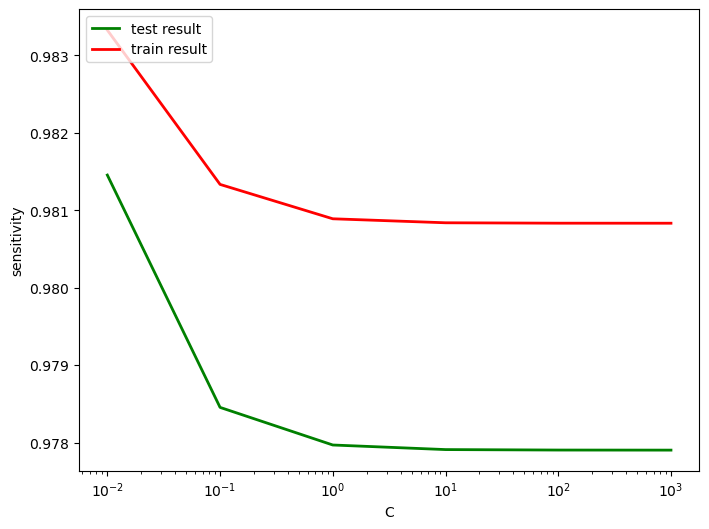

In [214]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], 'g-', linewidth=2.0)  # Green color for test results
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], 'r-', linewidth=2.0)  # Red color for train results
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

 The ‘C’ parameter in Logistic Regression controls the balance between keeping the model simple and reducing misclassification. The optimal ‘C’ is the one that achieves the best balance between these two objectives for the specific problem and dataset.

 In Logistic Regression, ‘C’ is like a decision-maker for the model. It helps the model decide what’s more important: getting the training data correct or keeping things simple.

- Higher ‘C’: The model tries its best to correctly classify all the training data, even if it means the model becomes complex. It’s like a student who tries to memorize everything for an exam.

- Lower ‘C’: The model prefers to keep things simple and avoids over-complicating, even if it gets some training data wrong. It’s like a student who understands the main concepts and doesn’t worry about memorizing every detail.

The ‘optimal C’ is the best balance between these two approaches for your specific problem and dataset. It’s like the best study strategy that gets good grades on both homework (training data) and exams (unseen data).

In [215]:
# Instantiate the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fit the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Predict and evalute the model on the train set

In [216]:
# Create a function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [217]:
# Make predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [218]:
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [219]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [220]:
# Make predicting for probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

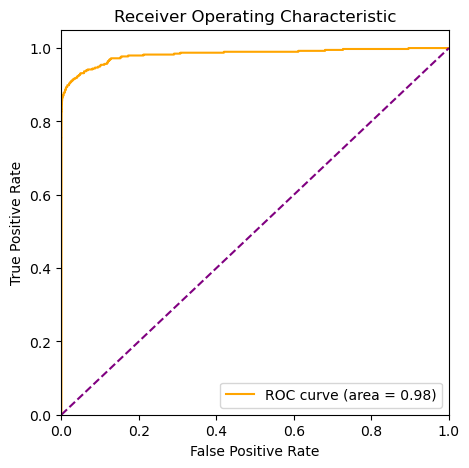

In [221]:
# ROC Curve function
#More colors are added

import matplotlib.pyplot as plt
from sklearn import metrics

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Resutls**

The values of ROC curve on the train data set is 0.98.

#### Evaluate the model on the test set

In [222]:
# Make predictions on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 67.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [223]:
# make redictions with probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

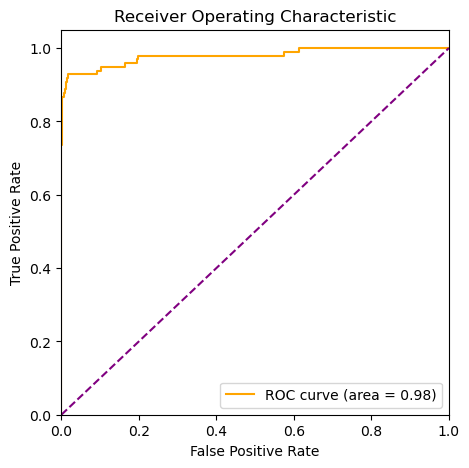

In [224]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Resutls**

The values of ROC curve on the test data set is 0.98.

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC : 98%
    - F1 Score: 73.76%
    
- Test set
    - ROC : 98%
    - F1 score: 67.9%

### 2. Descission Tree

In [225]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [226]:
# Get cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.695056,1.170200,0.071062,0.009469,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912639,0.927341,0.951697,0.930559,0.016107,5
1,12.254147,0.465687,0.074686,0.018768,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912640,0.919716,0.951705,0.928020,0.016995,6
2,12.360289,0.585185,0.060560,0.007499,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,3
3,12.938285,0.615898,0.065451,0.001768,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,3
4,20.011030,1.199891,0.058440,0.007092,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934919,0.916367,0.908212,0.919833,0.011175,8
5,19.830728,0.926134,0.064809,0.015520,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.927443,0.923872,0.923234,0.924850,0.001852,7
6,20.120311,0.485712,0.054244,0.016470,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963189,0.930658,0.915640,0.936496,0.019846,2
7,19.218916,1.021042,0.046244,0.016162,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963233,0.930682,0.915639,0.936518,0.019863,1


In [227]:
# Print the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9365177954412559
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Decision Tree with optimal hyperparameters

In [228]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Prediction on the train set

In [229]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



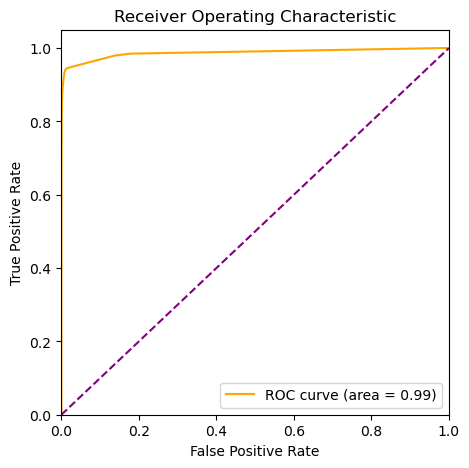

In [230]:
# Make predictions with probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluate the model on the test set

In [231]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



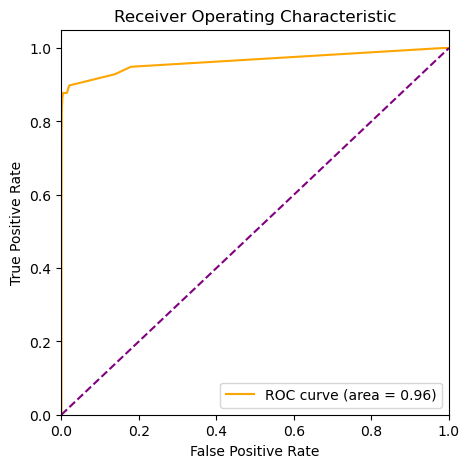

In [232]:
# Make predictions with probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC Score: 99%
    - F1 score : 72.33%
    
- Test set
    - ROC Score: 96%
    - F1 score : 71.88%

### 3. XGBoost

In [233]:
# create a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [234]:
# Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.381231,0.151317,0.088792,0.006894,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968831,0.960607,0.986866,0.972101,0.010967,6,0.999832,0.999843,0.999686,0.999787,0.000071
1,2.193611,0.026864,0.081925,0.003112,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975385,0.983747,0.987352,0.982161,0.005013,2,0.999883,0.999946,0.999879,0.999902,0.000031
2,2.164948,0.035092,0.077593,0.006795,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980065,0.976040,0.988241,0.981449,0.005076,3,0.999931,0.999922,0.999836,0.999896,0.000042
3,2.268226,0.013250,0.083252,0.002325,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974193,0.962130,0.983242,0.973189,0.008648,5,0.999997,0.999979,0.999995,0.999990,0.000008
4,2.343733,0.064276,0.078748,0.008584,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.978817,0.965375,0.980272,0.974821,0.006706,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,2.198367,0.012774,0.078743,0.006407,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.984408,0.978815,0.985159,0.982794,0.002830,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [235]:
# Print the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.982793816632015
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [236]:
# Print best parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

#### XGBoost model with optimal hyperparameter

In [237]:
# Print best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Evatuate model on train set

In [238]:
# Make predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



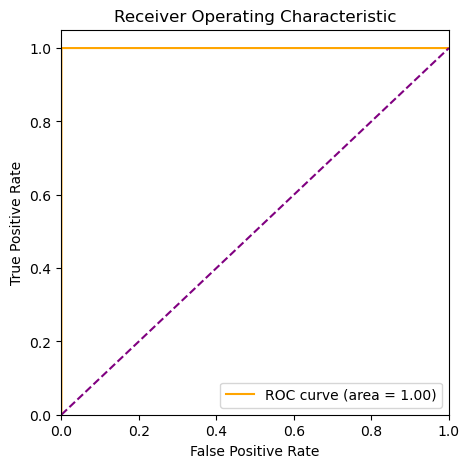

In [239]:
# Make predictions with probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluate the model on the test set

In [240]:
# Make predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



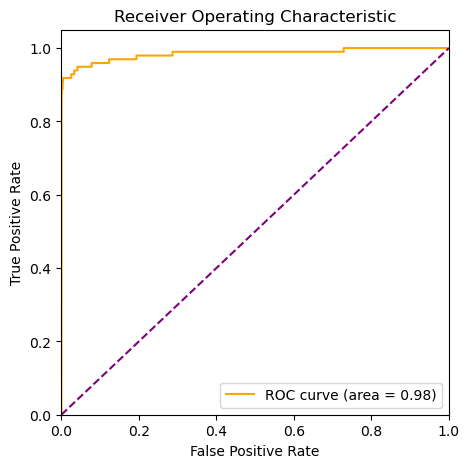

In [241]:
# Make predictions with probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score: 100%
    - F1 score: 100.0%
- Test set
    - ROC score: 98%
    - F1 score: 87.64%

**With the comparisons among three models, the XGBoost model performs well on the imbalanced data. For the train data, the value of the ROC-AUC score is 100%, while for test data, the one is 98%.**

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Presenting the top performance features for the best model from the dataset</div>

- After the transformation of the dataset through Principal Component Analysis (PCA), the top performance features become less interpretable. Nevertheless, the significant features are outlined below.

Top var = 14
2nd Top var = 7
3rd Top var = 10


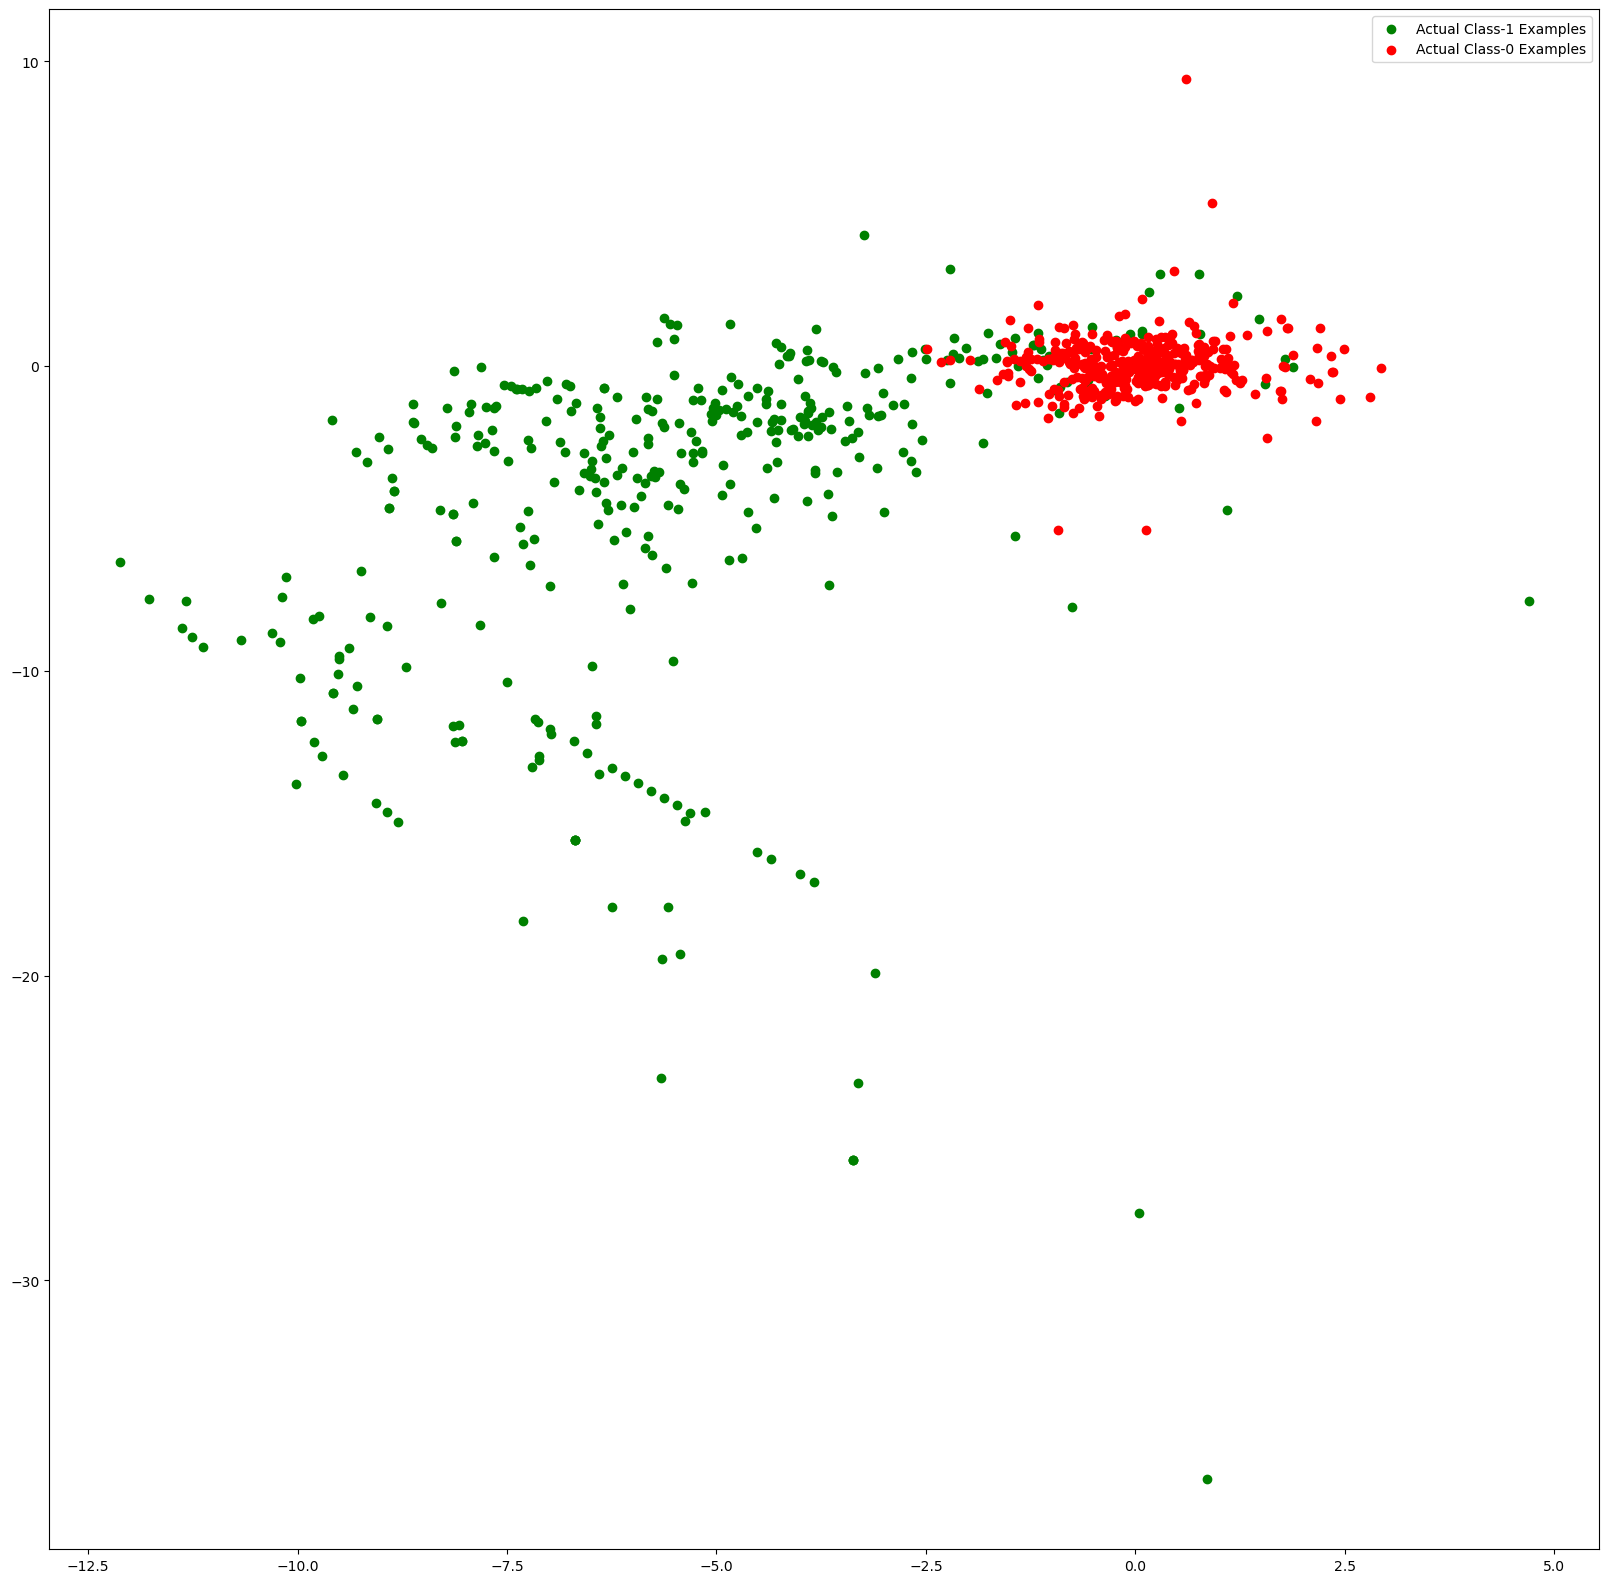

In [242]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-14 and Index-7 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples', c='green')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples', c='red')
plt.legend()

#### Present the best threshold from the FPR and TPR to get the roc curve for the best model
Below the code, argmax, is used to find the threshold that gives the best balance between the true positive rate (TPR) and false positive rate (FPR) for the receiver operating characteristic (ROC) curve

In [243]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81609064


It has been determined that a threshold of 82% yields the highest True Positive Rate (TPR) and the lowest False Positive Rate (FPR), resulting in a 100% Receiver Operating Characteristic (ROC) score on the training data.

## Build models with balanced Classes using sampling techniques

Below are the procedures with three sampling techniques used to handle data imbalance differently. Evaluations will be used basto compare the model performance.
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [60]:
!pip3 install -U scikit-learn imbalanced-learn

In [66]:
pip install -U imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [244]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [245]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regrassion with Random Oversampling

In [246]:
# Create KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specify score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9871747783492506
Best hyperparameters:  {'C': 10}


In [247]:
# Get cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.868503,0.038047,0.042599,0.007517,0.01,{'C': 0.01},0.987027,0.987136,0.987221,0.986757,0.986971,0.987022,0.000158,6,0.987075,0.986989,0.986936,0.987086,0.987082,0.987033,0.000060
1,0.860877,0.053313,0.039140,0.007697,0.10,{'C': 0.1},0.987159,0.987279,0.987356,0.986885,0.987111,0.987158,0.000161,5,0.987200,0.987129,0.987063,0.987227,0.987222,0.987168,0.000063
2,0.876515,0.064965,0.036385,0.008442,1.00,{'C': 1},0.987178,0.987295,0.987370,0.986898,0.987123,0.987173,0.000163,4,0.987217,0.987147,0.987077,0.987239,0.987234,0.987183,0.000062
3,0.852947,0.012192,0.040053,0.008959,10.00,{'C': 10},0.987182,0.987294,0.987373,0.986899,0.987125,0.987175,0.000163,1,0.987222,0.987147,0.987078,0.987241,0.987236,0.987185,0.000064
4,0.823800,0.039825,0.042393,0.009929,100.00,{'C': 100},0.987181,0.987295,0.987373,0.986899,0.987124,0.987174,0.000163,3,0.987221,0.987147,0.987078,0.987241,0.987234,0.987184,0.000063
5,0.859649,0.060118,0.046542,0.006594,1000.00,{'C': 1000},0.987181,0.987295,0.987373,0.986899,0.987125,0.987174,0.000163,2,0.987221,0.987147,0.987078,0.987241,0.987234,0.987184,0.000063


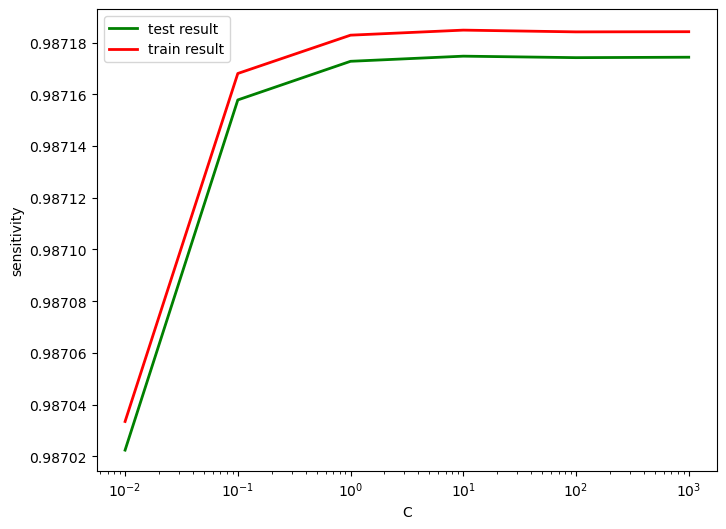

In [248]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], 'g-', linewidth=2.0)  # Green color for test results
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], 'r-', linewidth=2.0)  # Red color for train results
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with hyperparameter tuning

In [249]:
model_cv.best_params_

{'C': 10}

In [250]:
# Instantiate the model
logreg_over = LogisticRegression(C=10)

# Fit the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluate the model on train data

In [251]:
# Make predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [252]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.35%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



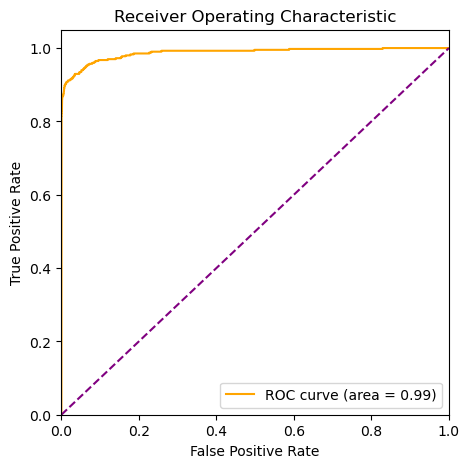

In [253]:
# Make predictions with probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluate on test data

In [254]:
# Evaluate on test data
y_test_pred = logreg_over_model.predict(X_test)

# Print the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.51%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



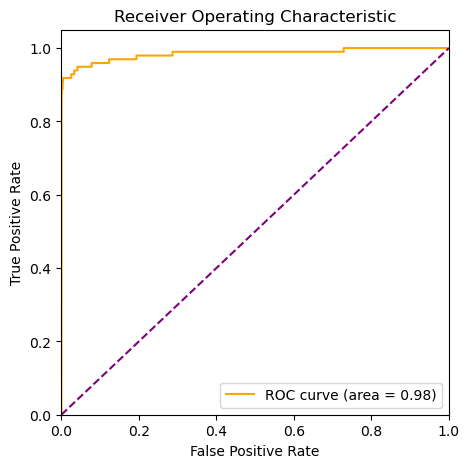

In [255]:
# Plot the ROC curve with orange line color
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 99%
    - F1 score: 94.35%
- Test set
    - ROC score : 98%
    - F1 score: 10.51%

### 2. Decision Tree with Random Oversampling

In [94]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [95]:
# Print the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9985683941704685
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [96]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Evatuate model on train data

In [97]:
# Make predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.4%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



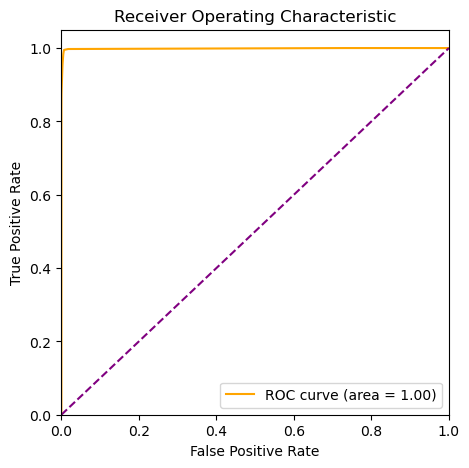

In [98]:
# Make predictions with probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Make predictions on the test set

In [99]:
# Evaluate model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 27.54%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.82      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



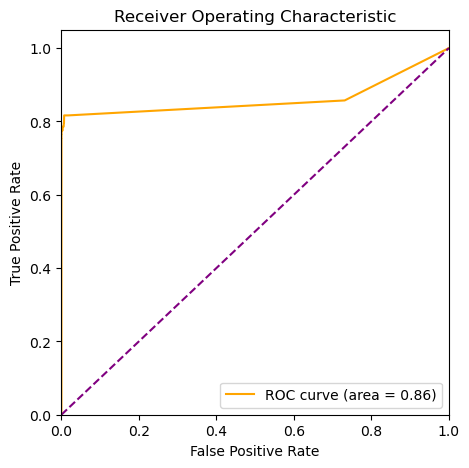

In [100]:
# Make predictions with probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 100%
    - F1 score: 99.4%
- Test set
    - ROC score : 84%
    - F1 score: 27.54%

### 3. XGBoost with Random Oversampling

In [101]:
# create a KFold object 
folds = 3

# specify a range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [102]:
# Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.294076,0.113853,0.124662,0.013091,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999877,0.999854,0.999835,0.999855,0.000017,6,0.999875,0.999870,0.999864,0.999870,4.391190e-06
1,3.392329,0.055652,0.137883,0.008603,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999856,0.999856,0.999862,0.999858,0.000003,4,0.999863,0.999882,0.999874,0.999873,7.766502e-06
2,3.282190,0.023842,0.133366,0.000134,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999863,0.999851,0.999857,0.999857,0.000005,5,0.999868,0.999867,0.999876,0.999870,3.817242e-06
3,3.328618,0.179599,0.137974,0.023848,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999970,0.999967,0.999975,0.999971,0.000003,3,0.999996,0.999996,0.999995,0.999996,2.478322e-07
4,3.492834,0.060760,0.134463,0.010782,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999983,0.999984,0.999976,0.999981,0.000004,1,0.999994,0.999997,0.999993,0.999995,1.975005e-06
5,3.273911,0.070105,0.122995,0.004763,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999981,0.999975,0.999979,0.999978,0.000002,2,0.999996,0.999994,0.999995,0.999995,5.777289e-07


In [103]:
# Print the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999809414831278
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [104]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

#### Run XGBoost with optimal hyperparameters

In [105]:
# Run with the chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Evatuate model on train data

In [106]:
# Make predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



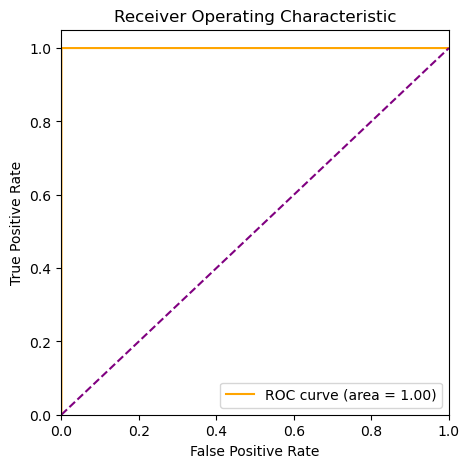

In [107]:
# Make predictions with probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evatuate model on the test set

In [108]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 90.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



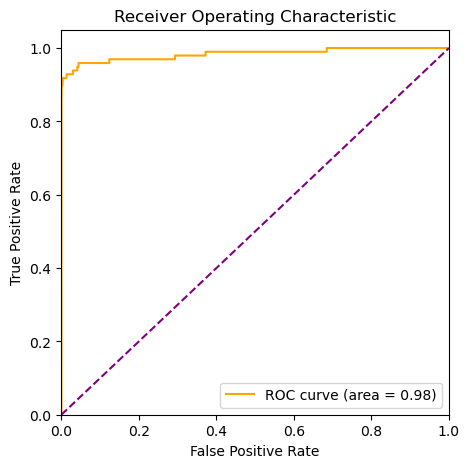

In [109]:
# Make predictions with probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 90.22%

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distributions after applying SMOTE sampling method

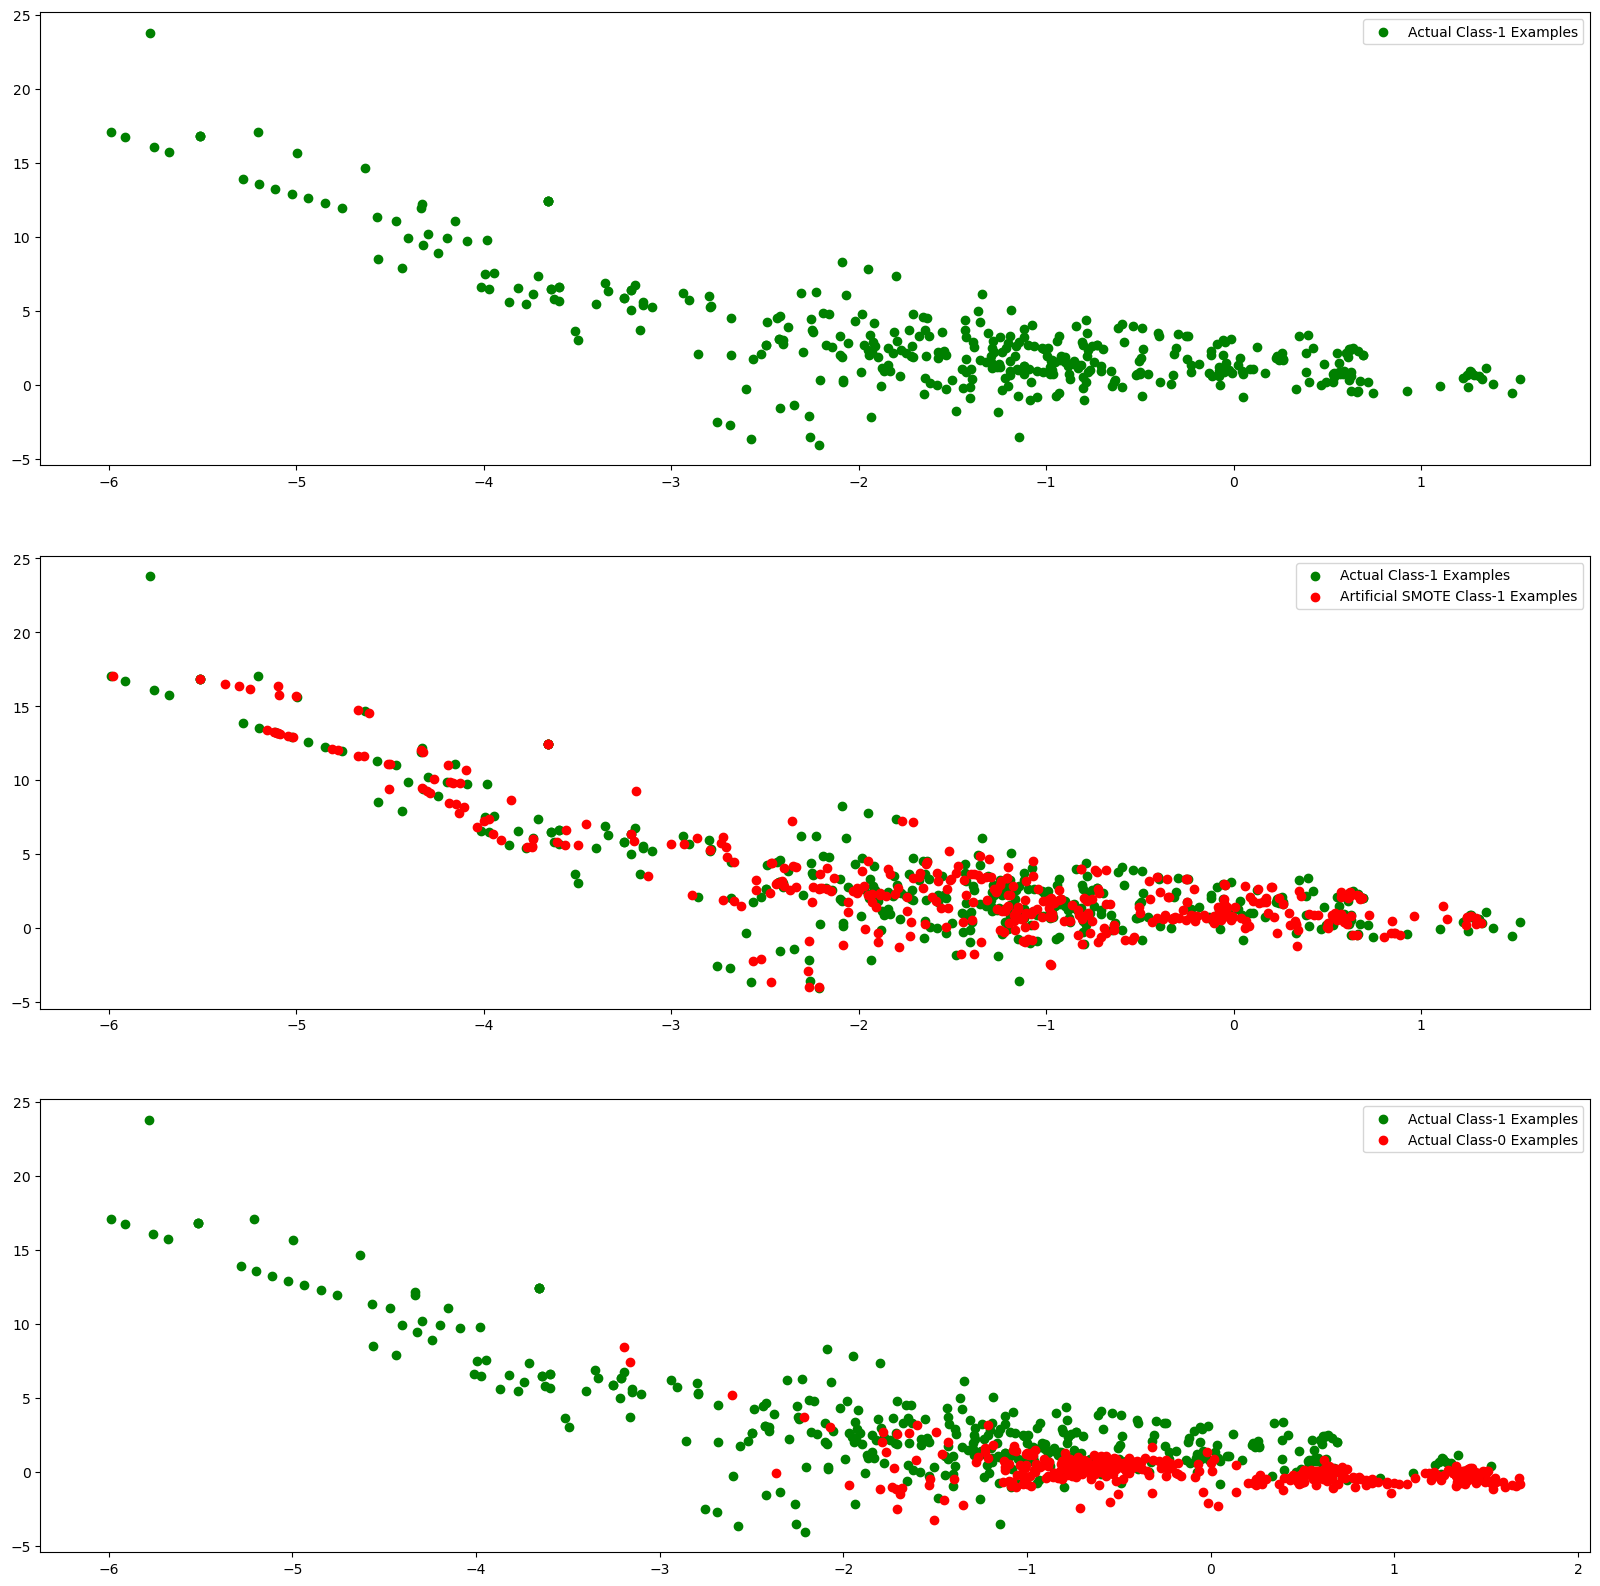

In [111]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', c='green')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', c='green')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples', c='red')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', c='green')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples', c='red')
plt.legend()

### 1. Logistic Regression on balanced data with SMOTE

In [112]:
# Create KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specify the score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9889850567288285
Best hyperparameters:  {'C': 1000}


In [113]:
# Get cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.766135,0.047921,0.038097,0.006713,0.01,{'C': 0.01},0.988651,0.989114,0.988999,0.988700,0.988880,0.988869,0.000175,6,0.988979,0.988781,0.988791,0.988910,0.988954,0.988883,0.000082
1,0.973422,0.055780,0.046989,0.008208,0.10,{'C': 0.1},0.988755,0.989218,0.989092,0.988807,0.988990,0.988973,0.000173,5,0.989080,0.988893,0.988891,0.989010,0.989057,0.988986,0.000080
2,0.947202,0.118336,0.041016,0.008887,1.00,{'C': 1},0.988766,0.989230,0.989103,0.988819,0.989004,0.988984,0.000173,4,0.989090,0.988905,0.988903,0.989021,0.989071,0.988998,0.000080
3,0.933993,0.069472,0.040824,0.006887,10.00,{'C': 10},0.988767,0.989231,0.989101,0.988820,0.989004,0.988985,0.000173,3,0.989091,0.988906,0.988902,0.989022,0.989071,0.988998,0.000080
4,0.971541,0.103961,0.044284,0.005728,100.00,{'C': 100},0.988767,0.989231,0.989103,0.988820,0.989004,0.988985,0.000173,2,0.989091,0.988906,0.988904,0.989022,0.989071,0.988999,0.000080
5,0.931176,0.093271,0.039211,0.006899,1000.00,{'C': 1000},0.988767,0.989231,0.989104,0.988820,0.989004,0.988985,0.000173,1,0.989091,0.988906,0.988904,0.989022,0.989071,0.988999,0.000080


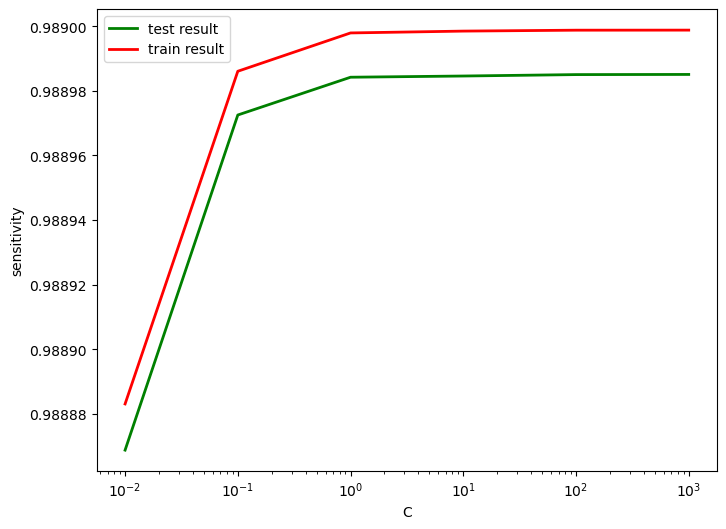

In [114]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], 'g-', linewidth=2.0)  # Green color for test results
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], 'r-', linewidth=2.0)  # Red color for train results
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [115]:
# Print best params
model_cv.best_params_

{'C': 1000}

In [117]:
# Instantiate the model
logreg_smote_model = LogisticRegression(C=1000)

# Fit the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

#### Evaluate the model on train data

In [118]:
# Evaluate on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.22%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



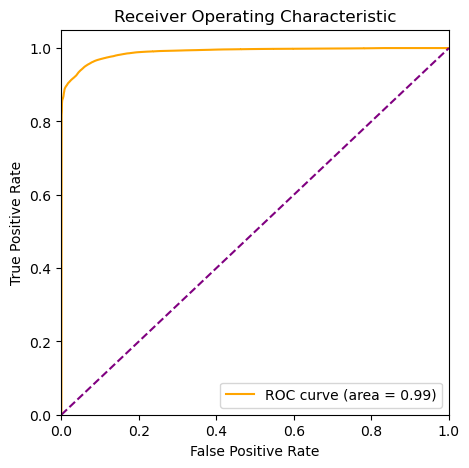

In [134]:
import matplotlib.pyplot as plt
from sklearn import metrics

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Make predictions with probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluate on test data

In [135]:
# Evaluate on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.78%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



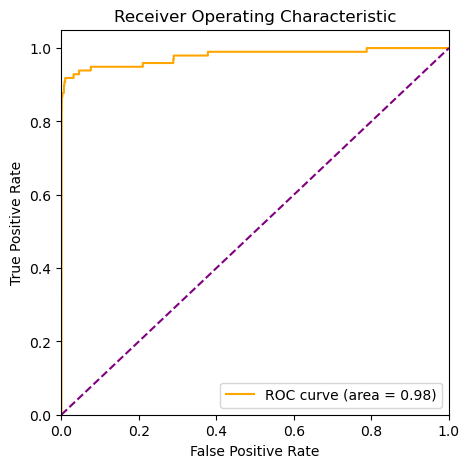

In [136]:
# Make predictions with probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 99%
    - F1 score: 94.22%
- Test set
    - ROC score : 98%
    - F1 score: 9.78%

### 2. Decision Tree on balanced data with the SMOTE sampling method

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [141]:
# Print the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9976377261833513
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with chosen optimal hyperparameters

In [142]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [140]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluate the model on train data

In [143]:
# Make predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



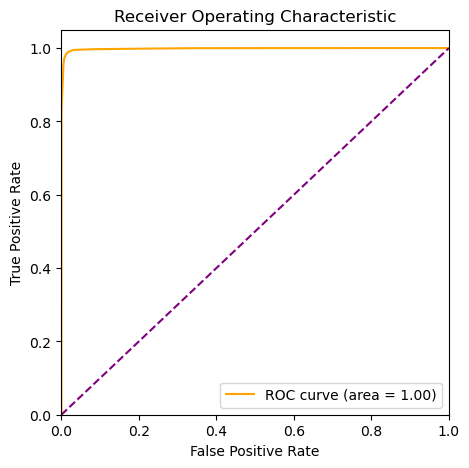

In [144]:
# Make predictions with probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluate the model on the test set

In [145]:
# Evaluate model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



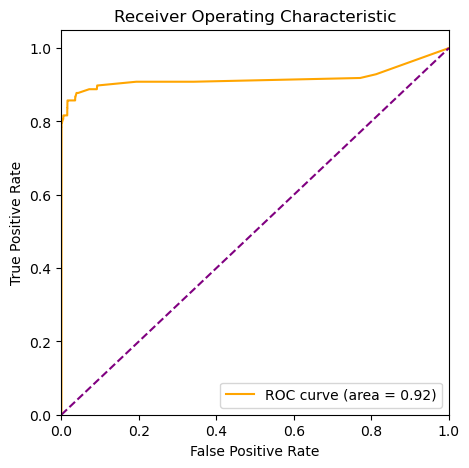

In [146]:
# Make predictions with probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 100%
    - F1 score: 98.61%
- Test set
    - ROC score : 92%
    - F1 score: 15.62%

### 3. XGBoost on balanced data with the SMOTE sampling method

In [147]:
# create a KFold object 
folds = 3

# specify a range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [148]:
# Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.358237,0.056935,0.130740,0.009953,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999511,0.999556,0.999494,0.999520,0.000026,5,0.999570,0.999553,0.999534,0.999552,0.000015
1,3.568775,0.022226,0.128578,0.013704,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999512,0.999544,0.999543,0.999533,0.000015,4,0.999577,0.999548,0.999580,0.999569,0.000014
2,3.312541,0.103670,0.160631,0.034735,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999495,0.999567,0.999483,0.999515,0.000037,6,0.999561,0.999567,0.999531,0.999553,0.000016
3,3.541335,0.060869,0.138343,0.004762,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999907,0.999922,0.999942,0.999924,0.000014,3,0.999962,0.999955,0.999968,0.999962,0.000005
4,3.650792,0.085461,0.143748,0.004610,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999923,0.999930,0.999940,0.999931,0.000007,1,0.999966,0.999959,0.999963,0.999963,0.000003
5,3.592228,0.209409,0.147724,0.010355,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999923,0.999929,0.999936,0.999929,0.000005,2,0.999955,0.999961,0.999963,0.999960,0.000004


In [149]:
# Print the optimal score and the chosen hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999310003781012
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with the chosen optimal hyperparameter

In [151]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [152]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Evaluate the model on the train data

In [153]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



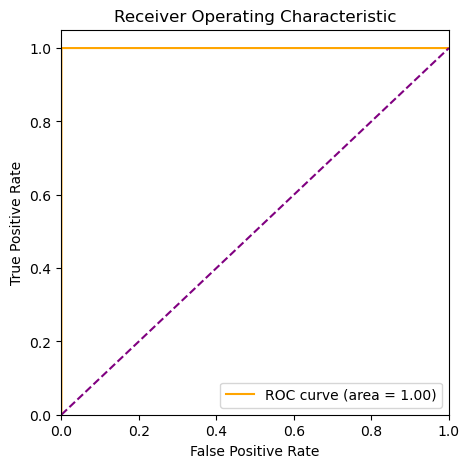

In [154]:
# Make predictions with probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluate the model on test data

In [156]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



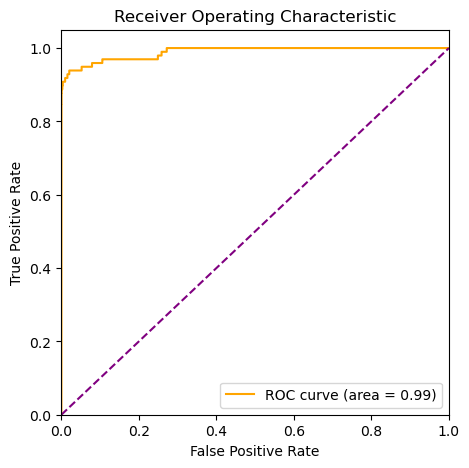

In [157]:
# Make predictions with probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 82.52%

## ADASYN (Adaptive Synthetic Sampling)

### Print out the class distributions after applying ADASYN

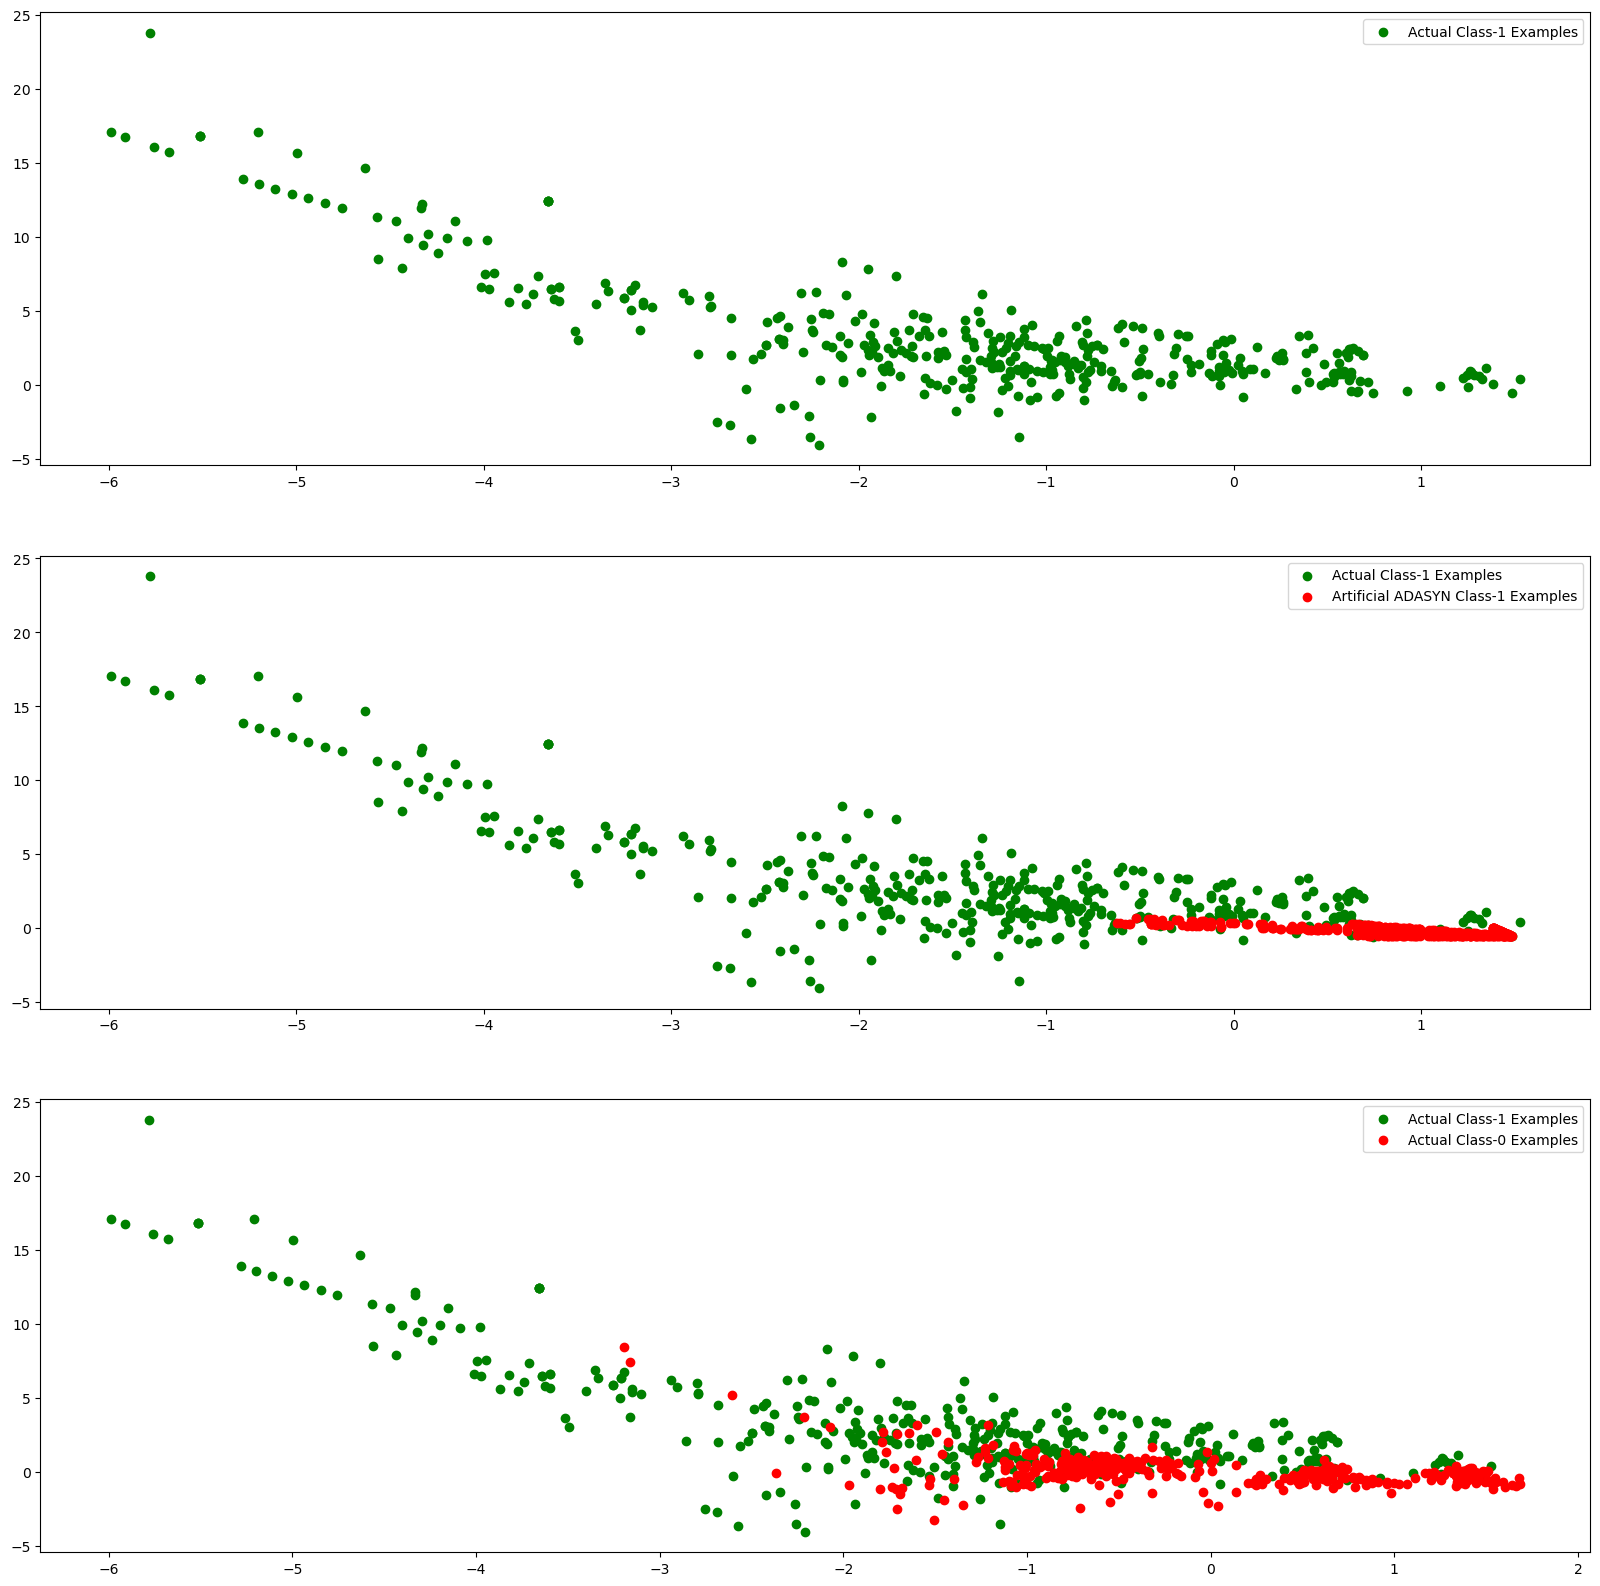

In [158]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', c='green')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', c='green')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples', c='red')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', c='green')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples', c='red')
plt.legend()

### 1. Logistic Regression on balanced data with the ADASYN sampling method

In [159]:
# Create KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specify the score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616414685446637
Best hyperparameters:  {'C': 1000}


In [160]:
# Get cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.946372,0.094717,0.084230,0.011553,0.01,{'C': 0.01},0.961196,0.961285,0.961634,0.961372,0.000189,6,0.961506,0.961237,0.961431,0.961391,0.000113
1,0.939478,0.077192,0.097286,0.015558,0.10,{'C': 0.1},0.961446,0.961528,0.961888,0.961620,0.000192,5,0.961764,0.961480,0.961678,0.961640,0.000119
2,1.086643,0.073619,0.087774,0.013488,1.00,{'C': 1},0.961467,0.961546,0.961907,0.961640,0.000192,4,0.961786,0.961498,0.961698,0.961660,0.000120
3,1.084952,0.055216,0.082181,0.017194,10.00,{'C': 10},0.961469,0.961544,0.961909,0.961641,0.000192,3,0.961788,0.961497,0.961699,0.961661,0.000122
4,1.108715,0.102841,0.083894,0.007954,100.00,{'C': 100},0.961470,0.961545,0.961909,0.961641,0.000192,2,0.961788,0.961498,0.961700,0.961662,0.000121
5,0.919749,0.046161,0.080973,0.007528,1000.00,{'C': 1000},0.961470,0.961546,0.961909,0.961641,0.000192,1,0.961788,0.961498,0.961700,0.961662,0.000121


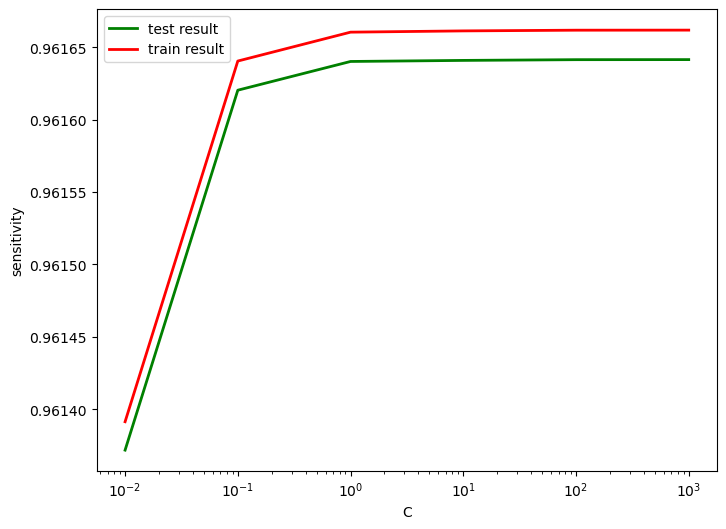

In [161]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], 'g-', linewidth=2.0)  # Green color for test results
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], 'r-', linewidth=2.0)  # Red color for train results
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [162]:
model_cv.best_params_

{'C': 1000}

In [163]:
# Instantiate the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fit the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluate the model with train data

In [164]:
# Evaluate on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



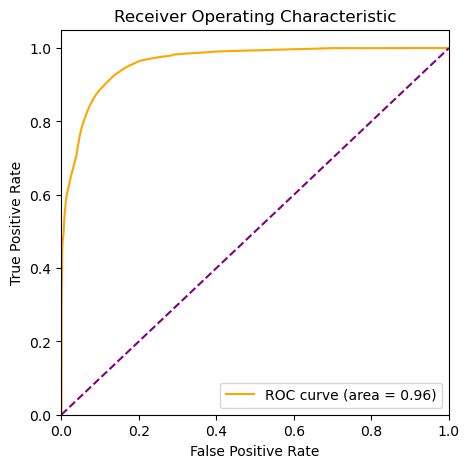

In [165]:
# Make predictions with probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluate on test data

In [166]:
# Evaluate on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



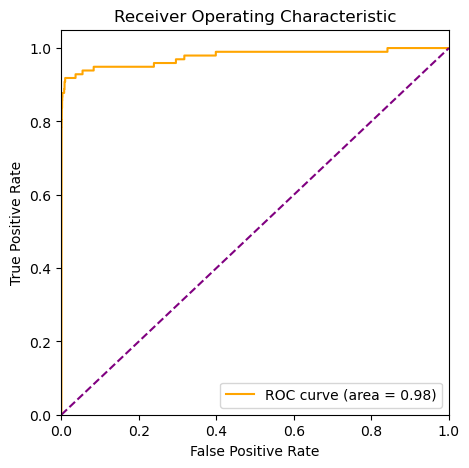

In [167]:
# Make predictions with probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 96%
    - F1 score: 89.2%
- Test set
    - ROC score : 98%
    - F1 score: 3.23%

### 2. Decision Tree on balanced data with the ADASYN sampling method

In [168]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [169]:
# Print the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9418459530944119
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Model with the chosen optimal hyperparameters

In [170]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Evaluate the model on train data

In [171]:
# Evaluate model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.63%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      0.99      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



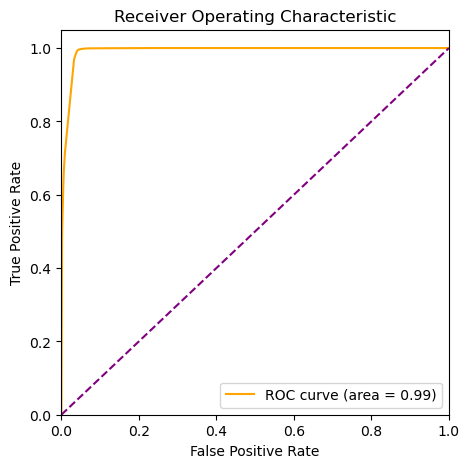

In [172]:
# Make predictions with probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluate the model on the test set

In [173]:
# Evaluate model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 6.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



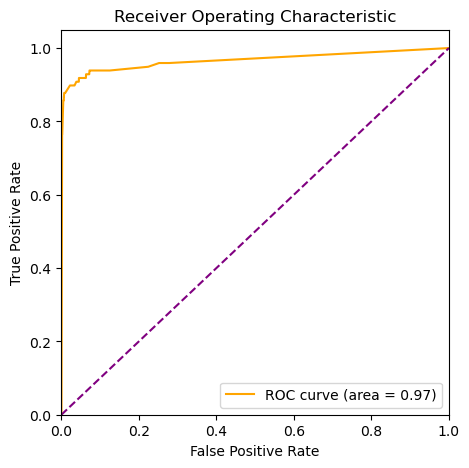

In [174]:
# Make predictions with probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 99%
    - F1 score: 97.63%
- Test set
    - ROC score : 95%
    - F1 score: 6.9%

### 3. XGBoost on balanced data with the ADASYN sampling model

In [175]:
# create a KFold object 
folds = 3

# specify a range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [176]:
# Get cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.776446,0.038493,0.173567,0.011516,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.982385,0.967957,0.995282,0.981874,0.011161,5,0.998848,0.999108,0.998558,0.998838,0.000225
1,3.746394,0.056914,0.155728,0.015315,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982086,0.967306,0.996356,0.981916,0.011860,4,0.998879,0.999095,0.998824,0.998932,0.000117
2,3.810509,0.210704,0.180249,0.010597,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982781,0.965640,0.995983,0.981468,0.012422,6,0.998981,0.998900,0.998709,0.998863,0.000114
3,3.893997,0.125513,0.164445,0.011174,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.992646,0.970869,0.998955,0.987490,0.012032,2,0.999909,0.999890,0.999882,0.999894,0.000011
4,4.072141,0.133267,0.178445,0.008475,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.994269,0.968853,0.998865,0.987329,0.013199,3,0.999921,0.999907,0.999900,0.999909,0.000009
5,3.708715,0.036394,0.169238,0.009652,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.994965,0.970772,0.998563,0.988100,0.012340,1,0.999913,0.999915,0.999894,0.999907,0.000009


In [177]:
# Print the optimal score and the chosen hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9881000316705739
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [178]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [179]:
# Print the chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Evaluate the model on the train data

In [180]:
# Predict on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Print the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



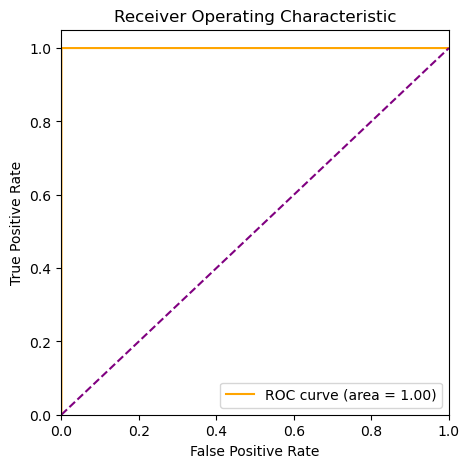

In [181]:
# Make predictions with probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluate the model on test data

In [182]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



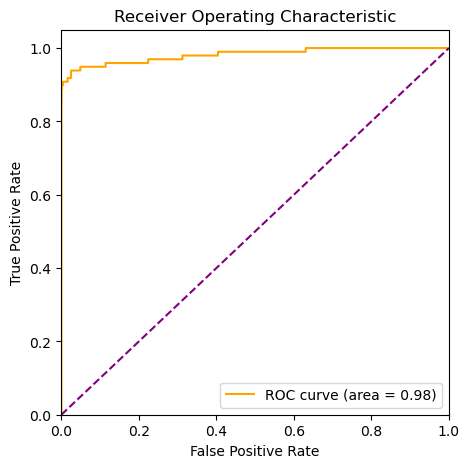

In [183]:
# Make predictions with probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Model Summary</div>

- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 82.3%

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Selecting the Optimal Oversampling Method for Enhanced Model Performance</div>


In this project, three balancing techniques have been employed to address the issue of minority class imbalance. These include Random Oversampling, SMOTE, and Adasyn techniques to equalize the dataset. Subsequently, logistic regression, random forest, and XGBoost algorithms were utilized to construct models based on each sampling method.

Upon evaluating the performance of each oversampling method, it was observed that the XGBoost model excelled when applied to the dataset balanced using the Adasyn technique. The model achieved a ROC score of **100%** on the training data and **98%** on the test data, along with an F1 score of **100%** on the training data and **82%** on the test data.

Therefore, it is concluded that the **XGBoost model combined with the Adasyn technique** stands out as the most effective model.

<div style="text-align:left; color:blue; font-size:22px; font-family:cursive; text-decoration: bold;">Presenting the top performance features for the best model from the dataset</div>

Top var = 14
2nd Top var = 4
3rd Top var = 8


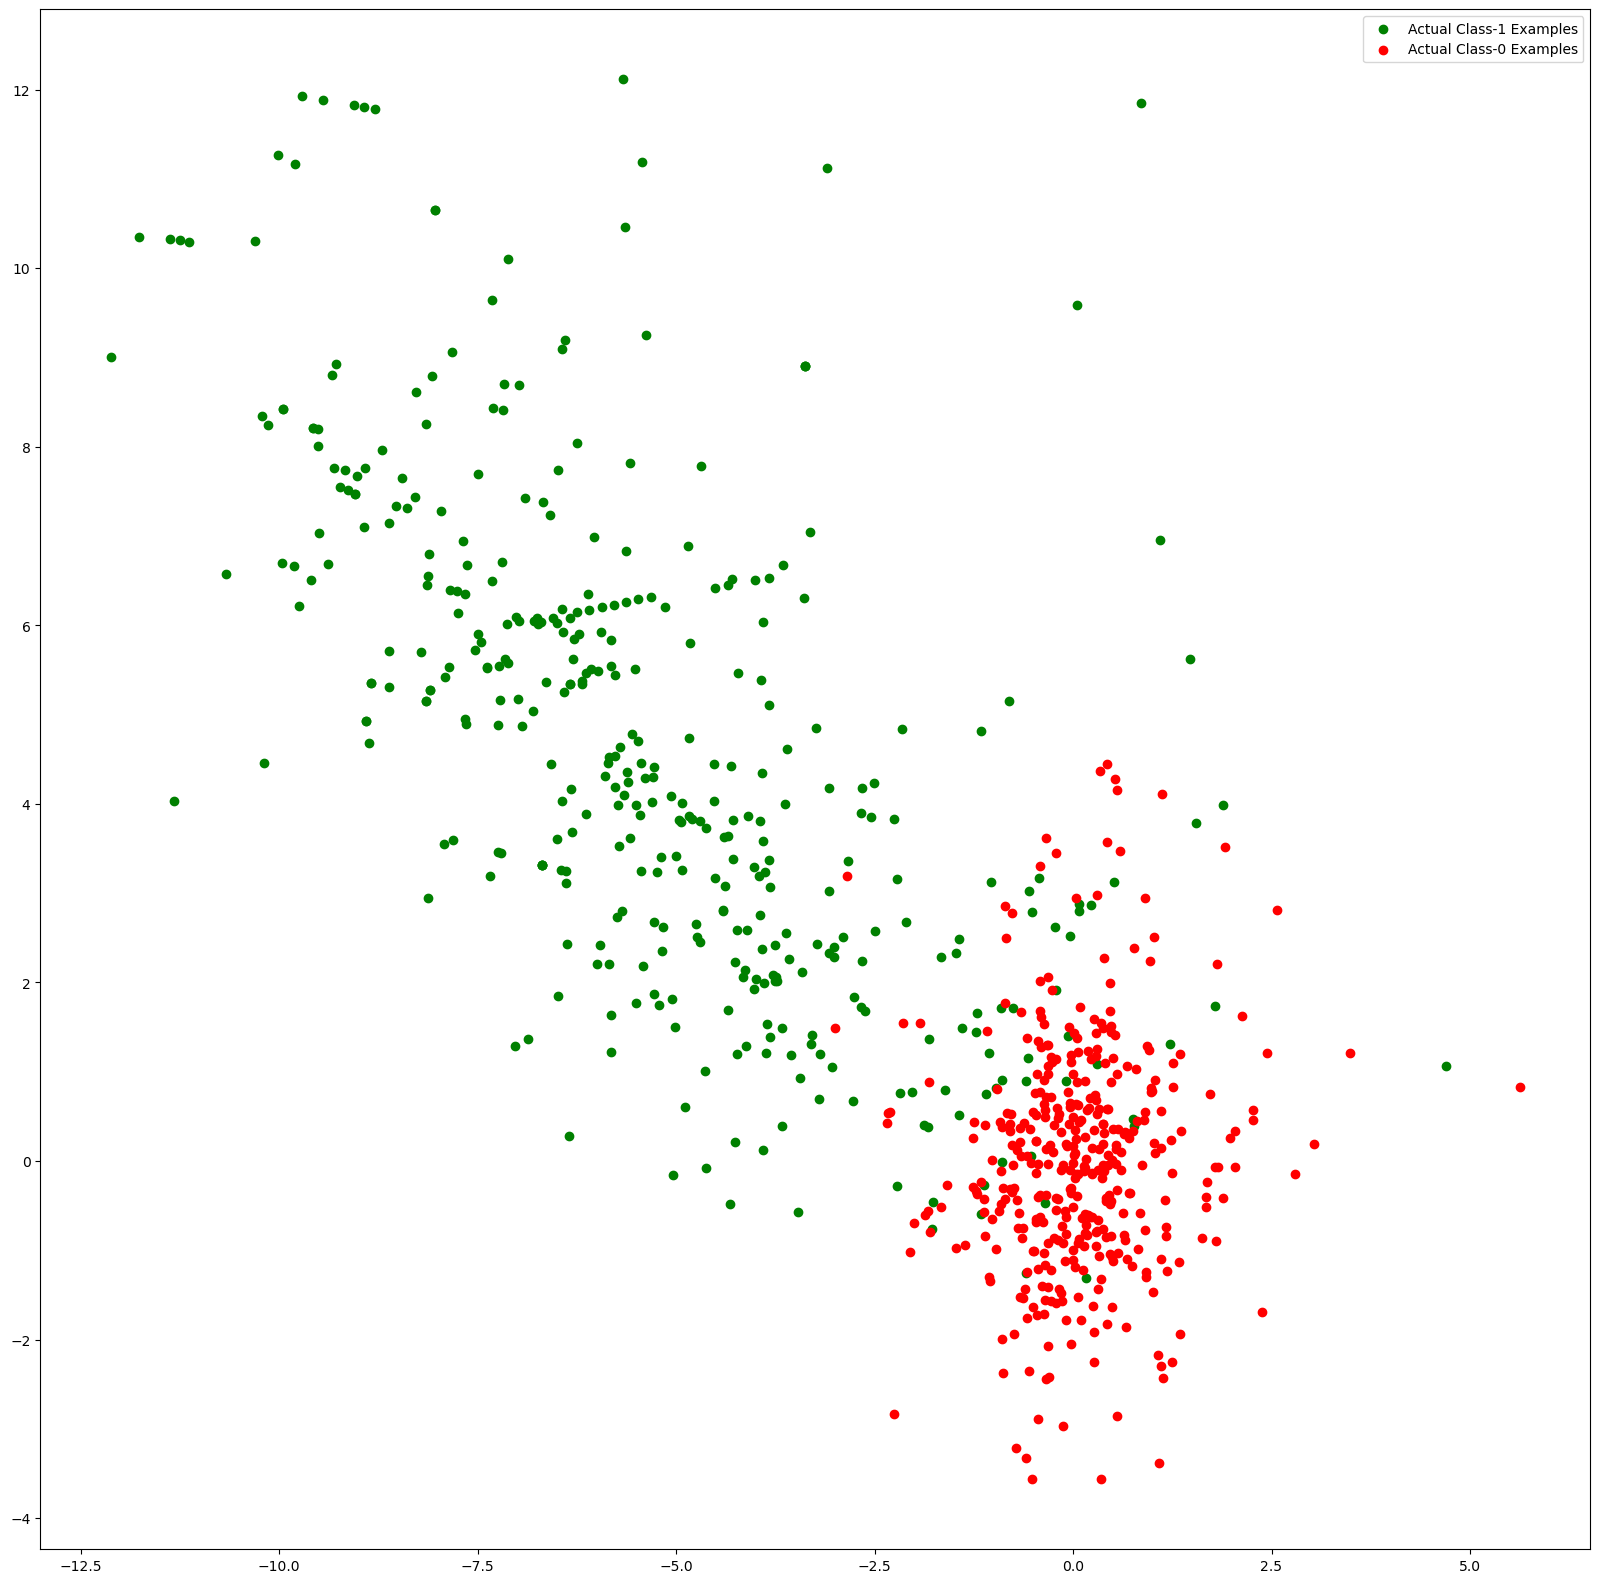

In [185]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples', c='green')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples', c='red')
plt.legend()

#### Present the best threshold from the FPR and TPR to get the roc curve for the best model

In [186]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9223263


It has been determined that a threshold of 92% yields the highest True Positive Rate (TPR) and the lowest False Positive Rate (FPR), resulting in a 100% Receiver Operating Characteristic (ROC) score on the training data.


<div style="text-align:left; color:brown; font-size:38px; font-family:cursive; text-decoration: bold;">Summary of the resutls</div>

<div style="text-align:left; color:orange; font-size:22px; font-family:cursive; text-decoration: bold;">Model Selection Strategies for XGBoost Model for the Credit Card Fraud Detection Project</div>

The pursuit of an effective solution for credit card fraud detection hinges on the primary objective of achieving a high recall rate. A robust recall is imperative for identifying a significant proportion of actual fraudulent transactions, thus providing a strong defense against potential high-value fraudulent activities.


<div style="text-align:left; color:orange; font-size:22px; font-family:cursive; text-decoration: bold;">Model Evaluations and Selection Procedures</div>

A systematic analysis was conducted, experimenting with various machine learning models and utilizing the ADASYN (Adaptive Synthetic Sampling) technique to balance the highly imbalanced dataset. The XGBoost model stood out as a top performer, with key findings including:

   --**Recall Rate:** An exceptionally high **Recall rate of 88%** was observed in the balanced dataset, a critical metric for accurately identifying a substantial portion of actual fraudulent transactions.

   --**ROC Score:** An impressive **ROC score of 98%** was achieved by the XGBoost model, demonstrating its efficacy in distinguishing between positive and negative classes.


<div style="text-align:left; color:orange; font-size:22px; font-family:cursive; text-decoration: bold;">Rationale for selecting XGBoost with the ADASYN framework</div>

The XGBoost model, paired with the ADASYN technique on a balanced dataset, is identified as the optimal choice for the credit card fraud detection solution. This decision is based on a thorough evaluation of performance metrics, where the model's ability to deliver an outstanding ROC score and, more importantly, prioritize recall, stands out as a decisive factor in reducing the impact of fraudulent transactions on financial institutions and their customers.

The integration of the **XGBoost model with the ADASYN framework** is set to improve proactive monitoring and fraud prevention strategies employed by banks, thereby strengthening their defenses against the dynamic challenges of credit card fraud.
